### Phase 2
State/UT wise analysis:
Note: You need to be careful as this phase is whole state/ut wise analysis (not district-wise).It is up to you which columns you want to keep or delete to make proper analysis"

2.1 Analysis of Literacy rate vs Total crimes.

2.2 Analysis of the type of crime vs each state vs Literacy rate.

2.3 Analysis of year-on-year total crime rate.

2.4 Analysis of area vs overall crime.

2.5 Analysis of population vs overall crime.

2.6 Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

import warnings
warnings.filterwarnings('ignore')

## ANALYSIS STATE/UT-WISE

## 2.1)Analysis of Literacy rate vs Total crimes.

In [2]:
df=pd.read_csv("CombineData.csv")

In [3]:
df

State/UT  Year  population(total)      Rural     Urban  \
0         A& N ISLANDS  2001             356152     239954    116198   
1       ANDHRA PRADESH  2001           76210007   55401067  20808940   
2    ARUNACHAL PRADESH  2001            1097968     870087    227881   
3                ASSAM  2001           26655528   23216288   3439240   
4                BIHAR  2001           82998509   74316709   8681800   
..                 ...   ...                ...        ...       ...   
415         TAMIL NADU  2012           72867204   40524361  32342843   
416            TRIPURA  2012            3717661    3088869    628792   
417      UTTAR PRADESH  2012          202226609  159783555  42443054   
418        UTTARAKHAND  2012           10260421    7670906   2589515   
419        WEST BENGAL  2012           92575564   66749935  25825629   

      Tot_Male  Tot_Female  Polulation_Literacy  Male_Literacy  \
0       192972      163180             253135.0       146831.0   
1     38527413    37682594           39934323.0     23444788.0   
2       579941      518027             484785.0       303281.0   
3     13777037    12878491           14015354.0      8188697.0   
4     43243795    39754714           31109577.0     20644376.0   
..         ...         ...                  ...            ...   
415   36680044    36477172           53274562.0     28573260.0   
416    1889371     1826534            2897340.0      1538903.0   
417  107092522    96666476          118889202.0     70418482.0   
418    5240528     5136562            7100774.0      3971891.0   
419   47417544    45045160           63274096.0     34529005.0   

     Female_Litracy  ...  IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0            106304  ...                                            0   
1          16489535  ...                                            7   
2            181504  ...                                            0   
3           5826657  ...                                            0   
4          10465201  ...                                           83   
..              ...  ...                                          ...   
415        24701302  ...                                            0   
416         1355550  ...                                            0   
417        48470720  ...                                            0   
418         3128883  ...                                            0   
419        28745091  ...                                           12   

     CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
0                              0               323               658   
1                           7400             34344            130089   
2                              0               618              2342   
3                           2010              9315             36877   
4                           2406             36667             88432   
..                           ...               ...               ...   
415                        15499            124176            200474   
416                           10              1742              6264   
417                        14406             68538            198093   
418                          670              2118              8882   
419                         4385             64482            161427   

     Total Crimes  tot_crimes_sc  total crime against women  \
0            1386              0                       34.0   
1          278982           2933                    13669.0   
2            5243              0                      180.0   
3           81418              6                     4048.0   
4          189612           1303                     4489.0   
..            ...            ...                        ...   
415        415626           1647                     6381.0   
416         13461             76                     1559.0   
417        444403           6202               

In [4]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 420 Rows and 48 Columns in our dataframe


In [5]:
df.columns

Index(['State/UT', 'Year', 'population(total)', 'Rural', 'Urban', 'Tot_Male',
       'Tot_Female', 'Polulation_Literacy', 'Male_Literacy', 'Female_Litracy',
       'Litracy_rate', 'Area (km2)', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crimes', 'tot_crimes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   State/UT                                             420 non-null    object 
 1   Year                                                 420 non-null    int64  
 2   population(total)                                    420 non-null    int64  
 3   Rural                                                420 non-null    int64  
 4   Urban                                                420 non-null    int64  
 5   Tot_Male                                             420 non-null    int64  
 6   Tot_Female                                           420 non-null    int64  
 7   Polulation_Literacy                                  420 non-null    float64
 8   Male_Literacy                                        420 non-null    f

In [7]:
(df['State/UT'].unique())

array(['A& N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [8]:
len(df['State/UT'].unique())

35

The data has total 35 states and union territories(from 2001 to 2012), but there are 36 as of 2023 (Telangana state is missing in the dataset)

In [9]:
df.head()

State/UT  Year  population(total)     Rural     Urban  Tot_Male  \
0       A& N ISLANDS  2001             356152    239954    116198    192972   
1     ANDHRA PRADESH  2001           76210007  55401067  20808940  38527413   
2  ARUNACHAL PRADESH  2001            1097968    870087    227881    579941   
3              ASSAM  2001           26655528  23216288   3439240  13777037   
4              BIHAR  2001           82998509  74316709   8681800  43243795   

   Tot_Female  Polulation_Literacy  Male_Literacy  Female_Litracy  ...  \
0      163180             253135.0       146831.0          106304  ...   
1    37682594           39934323.0     23444788.0        16489535  ...   
2      518027             484785.0       303281.0          181504  ...   
3    12878491           14015354.0      8188697.0         5826657  ...   
4    39754714           31109577.0     20644376.0        10465201  ...   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   
1                                            7                         7400   
2                                            0                            0   
3                                            0                         2010   
4                                           83                         2406   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total Crimes  tot_crimes_sc  \
0               323               658          1386              0   
1             34344            130089        278982           2933   
2               618              2342          5243              0   
3              9315             36877         81418              6   
4             36667             88432        189612           1303   

   total crime against women  Total crimes against STs  \
0                       34.0                       1.0   
1                    13669.0                     512.0   
2                      180.0                      72.0   
3                     4048.0                       0.0   
4                     4489.0                      83.0   

   Total crime against children  Crime Rate  
0                           0.0  184.752578  
1                         270.0  170.698055  
2                           0.0  213.303120  
3                          18.0  138.346537  
4                          83.0  106.546492  

[5 rows x 48 columns]

In [10]:
df.isnull().sum()

State/UT                                                0
Year                                                    0
population(total)                                       0
Rural                                                   0
Urban                                                   0
Tot_Male                                                0
Tot_Female                                              0
Polulation_Literacy                                     0
Male_Literacy                                           0
Female_Litracy                                          0
Litracy_rate                                            0
Area (km2)                                              0
MURDER                                                  0
ATTEMPT TO MURDER                                       0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               0
RAPE                                                    0
CUSTODIAL RAPE                                          0
OTHER RAPE    

we see  that some column have a null value.

1. total crime against women

2. Total crimes against STs

3. Total crime against children

Filling Null Values using mean methods

In [11]:
df['Total crimes against STs'].describe()

count     387.000000
mean      185.077519
std       393.275773
min         0.000000
25%         0.000000
50%         6.000000
75%       209.500000
max      2894.000000
Name: Total crimes against STs, dtype: float64

In [12]:
df['Total crimes against STs']=df['Total crimes against STs'].fillna(df['Total crimes against STs'].mean())

In [13]:
df['Total crime against children'].describe()

count     418.000000
mean      587.267943
std      1036.458881
min         0.000000
25%        26.000000
50%       103.000000
75%       632.250000
max      6033.000000
Name: Total crime against children, dtype: float64

In [14]:
df['Total crime against children']=df['Total crime against children'].fillna(df['Total crime against children'].mean())

In [15]:
df['total crime against women']=df['total crime against women'].fillna(df['total crime against women'].mean())

#### Again Checking for null values.

In [16]:
df.isnull().sum().sum()

0

In [17]:
df['State/UT'].value_counts()

A& N ISLANDS         12
PUDUCHERRY           12
MAHARASHTRA          12
MANIPUR              12
MEGHALAYA            12
MIZORAM              12
NAGALAND             12
ODISHA               12
PUNJAB               12
LAKSHADWEEP          12
RAJASTHAN            12
SIKKIM               12
TAMIL NADU           12
TRIPURA              12
UTTAR PRADESH        12
UTTARAKHAND          12
MADHYA PRADESH       12
KERALA               12
ANDHRA PRADESH       12
DAMAN & DIU          12
ARUNACHAL PRADESH    12
ASSAM                12
BIHAR                12
CHANDIGARH           12
CHHATTISGARH         12
D & N HAVELI         12
DELHI                12
KARNATAKA            12
GOA                  12
GUJARAT              12
HARYANA              12
HIMACHAL PRADESH     12
JAMMU & KASHMIR      12
JHARKHAND            12
WEST BENGAL          12
Name: State/UT, dtype: int64

Each state is occuring total 12 times as  our data from 2001 to 2012.

In [18]:
df.describe()

Year  population(total)         Rural         Urban  \
count   420.000000       4.200000e+02  4.200000e+02  4.200000e+02   
mean   2006.500000       3.210516e+07  2.325755e+07  8.964941e+06   
std       3.456169       4.090185e+07  3.099496e+07  1.152126e+07   
min    2001.000000       6.065000e+04  3.368300e+04  2.696700e+04   
25%    2003.750000       1.302120e+06  7.259828e+05  5.533638e+05   
50%    2006.500000       1.507539e+07  8.597313e+06  3.753114e+06   
75%    2009.250000       5.705401e+07  3.649124e+07  1.504703e+07   
max    2012.000000       2.022266e+08  1.597836e+08  4.826007e+07   

           Tot_Male    Tot_Female  Polulation_Literacy  Male_Literacy  \
count  4.200000e+02  4.200000e+02         4.200000e+02   4.200000e+02   
mean   1.659190e+07  1.560647e+07         1.901633e+07   1.109371e+07   
std    2.116180e+07  1.960728e+07         2.336704e+07   1.379373e+07   
min    3.113100e+04  2.951900e+04         4.468300e+04   2.451100e+04   
25%    6.866452e+05  6.526302e+05         8.984955e+05   4.681158e+05   
50%    8.333013e+06  7.219828e+06         1.063014e+07   6.315500e+06   
75%    2.947709e+07  2.766350e+07         3.261374e+07   2.000440e+07   
max    1.070925e+08  9.666648e+07         1.188892e+08   7.041848e+07   

       Female_Litracy  Litracy_rate  ...  \
count    4.200000e+02    420.000000  ...   
mean     7.963801e+06     74.304929  ...   
std      9.675254e+06      9.942087  ...   
min      2.017200e+04     47.000000  ...   
25%      4.343975e+05     66.382500  ...   
50%      4.422024e+06     74.495000  ...   
75%      1.341985e+07     82.187500  ...   
max      4.847072e+07     94.500000  ...   

       IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
count                                   420.000000   
mean                                      2.123810   
std                                       8.914278   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                      83.000000   

       CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
count                   420.000000        420.000000        420.000000   
mean                   2385.038095      23342.764286      57005.423810   
std                    3665.682348      29318.488594      66190.228036   
min                       0.000000          5.000000         31.000000   
25%                      35.000000        693.750000       2408.500000   
50%                     463.500000      10414.500000      30116.500000   
75%                    3025.000000      41774.750000     109178.500000   
max                   16076.000000     124176.000000     220335.000000   

        Total Crimes  tot_crimes_sc  total crime against women  \
count     420.000000     420.000000                 420.000000   
mean   123764.880952   14884.821429                5141.299270   
std    143105.441854   91151.189568                6527.890804   
min        72.000000       0.000000                   0.000000   
25%      5390.250000       0.000000                 134.750000   
50%     65035.500000      23.500000                2617.000000   
75%    232218.750000     710.500000                7459.500000   
max    472008.000000  653748.000000               30585.000000   

       Total crimes against STs  Total crime against children    Crime Rate  
count                420.000000                    420.000000    420.000000  
mean                 185.077519                    587.267943    234.148195  
std                  377.471210                   1033.982273    868.709314  
min                    0.000000                      0.000000     18.551635  
25%                    0.000000                     26.000000    115.283230  
50%                   12.000000                    104.000000    182.181858  
75%                  185.077519           

describe method showing all the min,max, 25%,50% ,75% statistics of dataset

In 2012, the maximum literacy rate was 94.5, while in 2001, the minimum literacy rate was 47.

## Visulaization:

visulaising the columns , here we starting with the Type of crime like , Murder, Rape, Robbery happend in each year

Text(0, 0.5, 'Cases of INSULT TO MODESTY OF WOMEN in India')

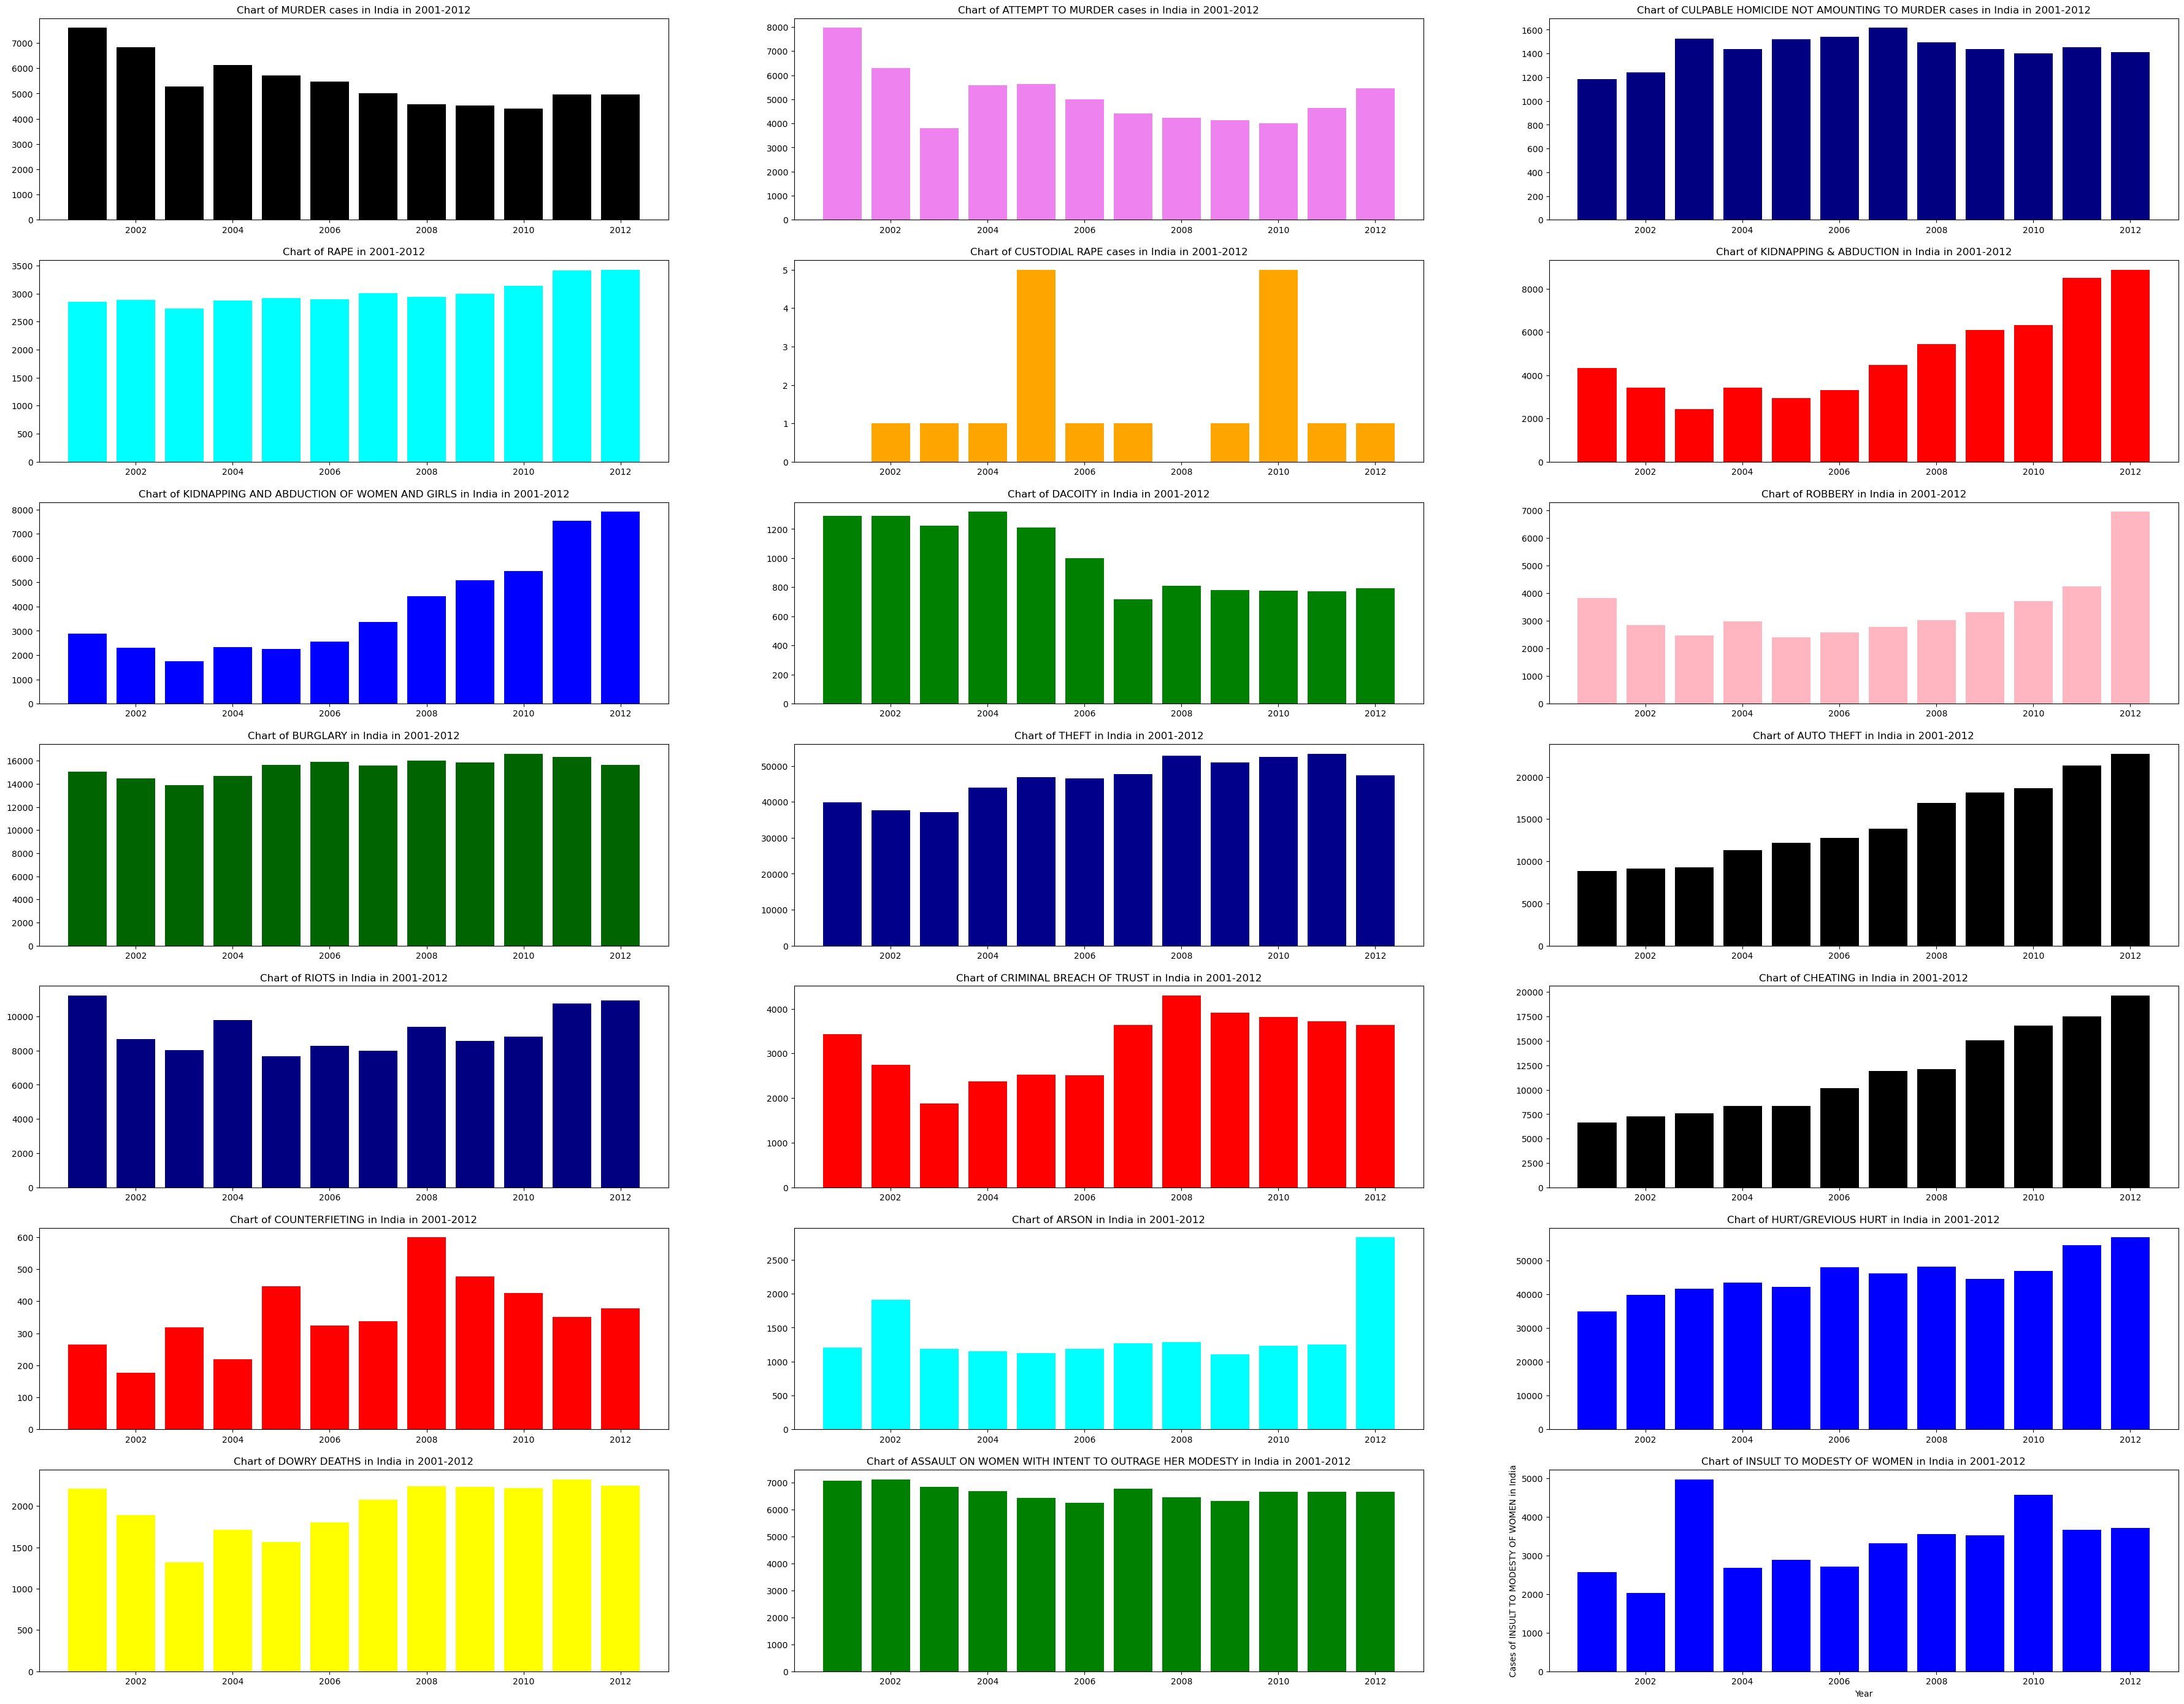

In [19]:
#Bar graphs showing all crimes from 2001 to 2012 
fig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(df['Year'], df['MURDER'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of MURDER in India') #Y-axis

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(df['Year'], df['ATTEMPT TO MURDER'], color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ATTEMPT TO MURDER in India') #Y-axis

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(df['Year'], df['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India') #Y-axis

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(df['Year'], df['RAPE'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RAPE in India') #Y-axis

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(df['Year'], df['CUSTODIAL RAPE'], color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CUSTODIAL RAPE in India') #Y-axis

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(df['Year'], df['KIDNAPPING & ABDUCTION'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India') #Y-axis

axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS in India in 2001-2012")
axes[2,0].bar(df['Year'], df['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS in India') #Y-axis


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(df['Year'], df['DACOITY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DACOITY in India') #Y-axis

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(df['Year'], df['ROBBERY'], color = 'lightpink');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ROBBERY in India') #Y-axis

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(df['Year'], df['BURGLARY'], color = 'darkgreen');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of BURGLARY in India') #Y-axis


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(df['Year'], df['THEFT'], color = 'darkblue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of THEFT in India') #Y-axis

axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(df['Year'], df['AUTO THEFT'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of AUTO THEFT in India') #Y-axis


axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(df['Year'], df['RIOTS'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RIOTS') #Y-axis

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(df['Year'], df['CRIMINAL BREACH OF TRUST'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India') #Y-axis


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(df['Year'], df['CHEATING'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CHEATING in India') #Y-axis

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(df['Year'], df['COUNTERFIETING'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of COUNTERFIETING in India') #Y-axis

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(df['Year'], df['ARSON'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ARSON in India') #Y-axis

axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(df['Year'], df['HURT/GREVIOUS HURT'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of HURT/GREVIOUS HURT in India') #Y-axis

axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(df['Year'], df['DOWRY DEATHS'], color = 'yellow');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DOWRY DEATHS in India') #Y-axis

axes[6,1].set_title("Chart of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India in 2001-2012")
axes[6,1].bar(df['Year'], df['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India') #Y-axis

axes[6,2].set_title("Chart of INSULT TO MODESTY OF WOMEN in India in 2001-2012")
axes[6,2].bar(df['Year'], df['INSULT TO MODESTY OF WOMEN'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India') #Y-axis

Observations:

1. Cases of Murder , Attempt to Murder and Daocity has shown an decreasing over the year.

2. As we can see, there has been an upward trend in the number of rapes, kidnappings, robberies, auto theft, cheating, jealous hurts, and arson cases throughout the years.

3. Burglary,Dowry Deaths, Assault on women wth intent to outrage her modesty,Culpable Homicide not amounting to murder cases have remained the same and do not show any trend (upward or downward)

4. Custodial Rape shows few peaks like in year 2005 and 2010.Cunterfieting has no fix trend



### State/UT Vs Literacy Rate

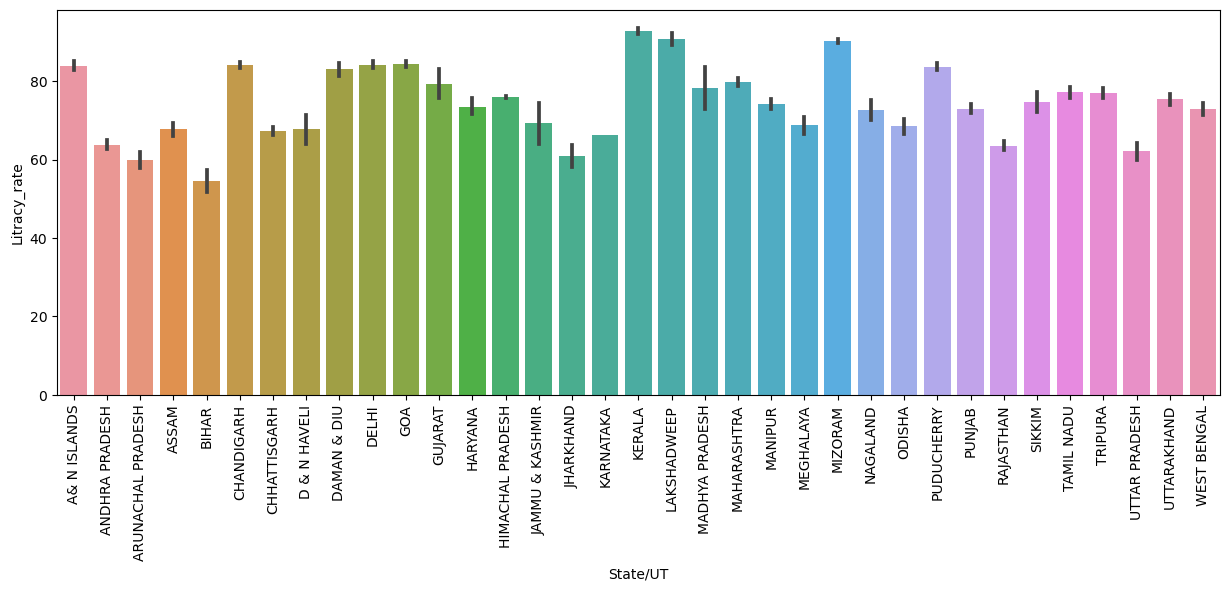

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x='State/UT', y='Litracy_rate', data=df)
plt.xticks(rotation=90)  # Use an integer value for rotation
plt.savefig("1.jpg")
plt.show()

As per this barplot State Kerala has the Highest Litracy_rate and Bihar has the lowest Literacy rate.

### State/UT VS Total Crimes

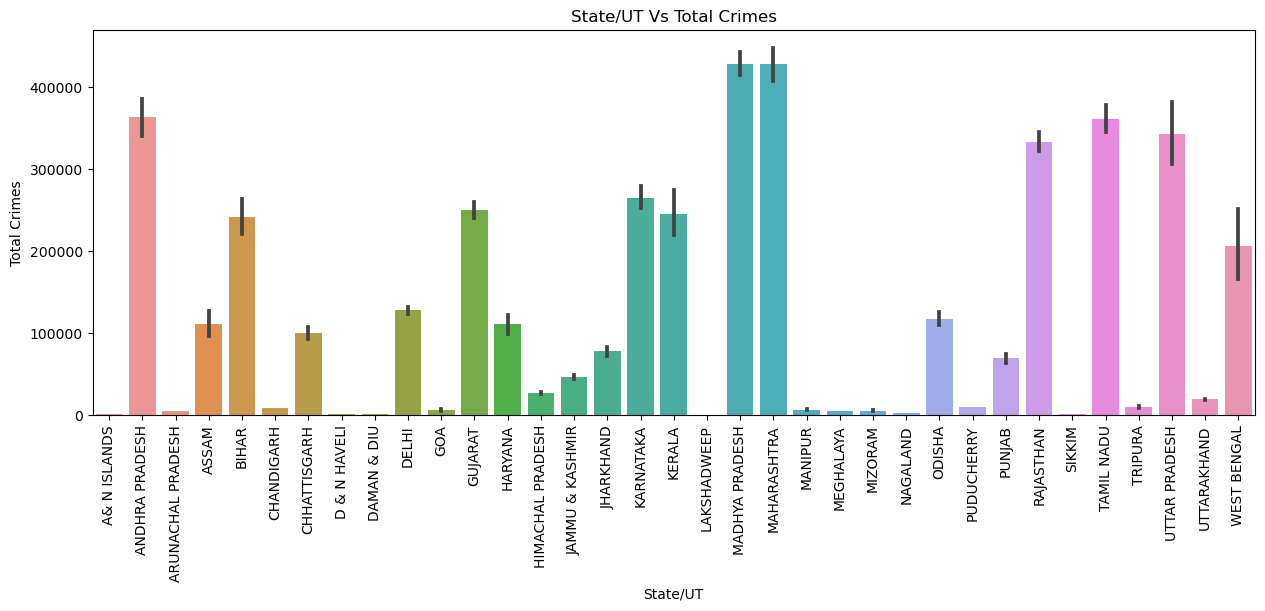

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total Crimes'])
plt.xticks(rotation=90)
plt.title('State/UT Vs Total Crimes')
plt.savefig("2.jpg")
plt.show()

States Arunachal Praddeh,Chandigarh,D&N Haveli,,Goa,Manipur, Meghayala,MIzoram, NAgaland,Pudducheery, Sikkim has least Total crimes as compare to Madhya Pradesh,Maharashtra, Uttar Pradesh as high Total Crimes.

### Year Vs Total no.of Crimes

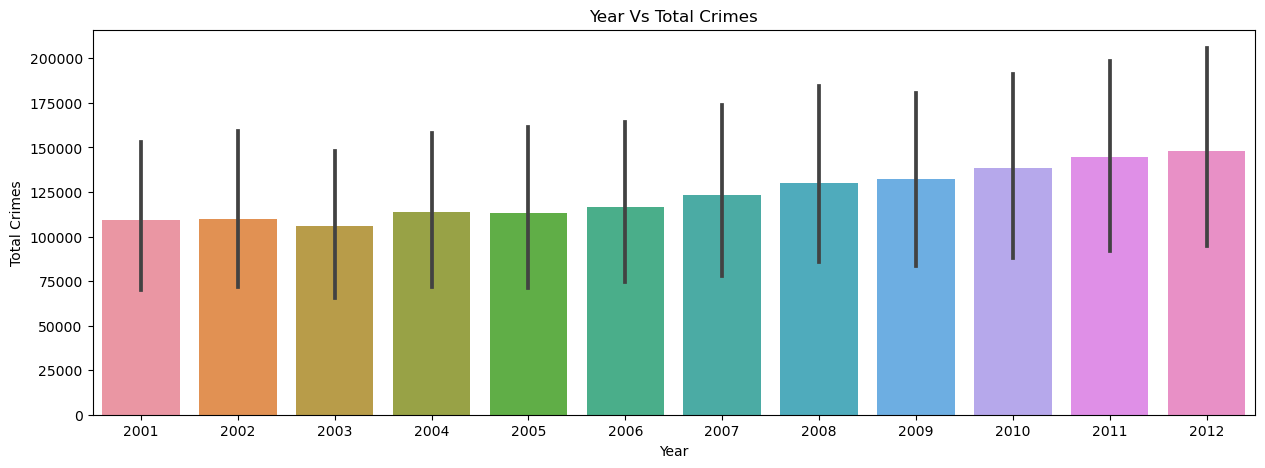

In [22]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Total Crimes'])
plt.title('Year Vs Total Crimes')
plt.savefig("3.jpg")
plt.show()

 highest total crimes was in 2012, while the lowest was in 2001.

### State/UT VS Total Crimes Aginst SCs

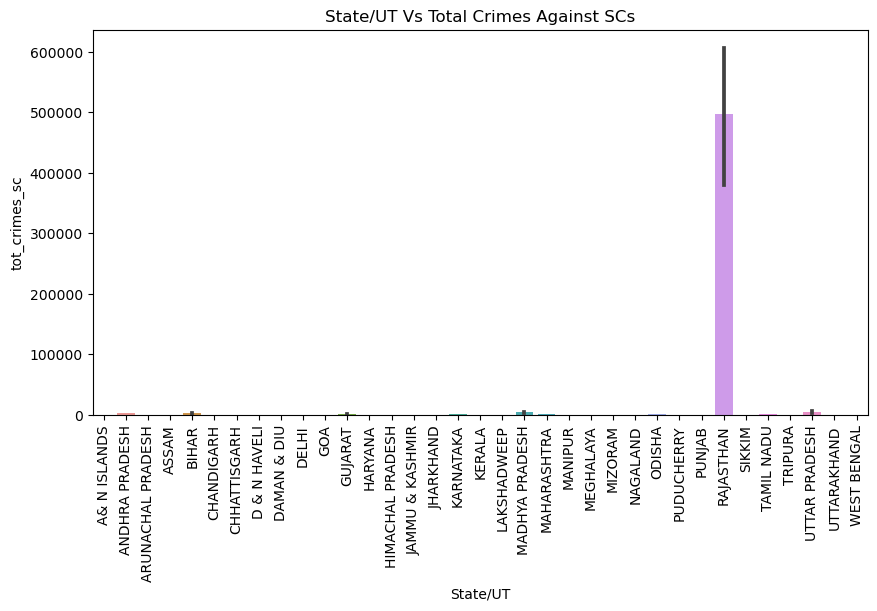

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['State/UT'], y=df['tot_crimes_sc'])
plt.xticks(rotation= 90)
plt.title('State/UT Vs Total Crimes Against SCs')
plt.savefig("4.jpg")
plt.show()

States Rajasthan has the highest crimes againast SCs and states  Andhra Pradesh, Bihar ,Karnataka,Madhya Pradesh,Uttar Pradesh has lesser Crimes against SCS

### State/UT Vs Total Crimes against STs

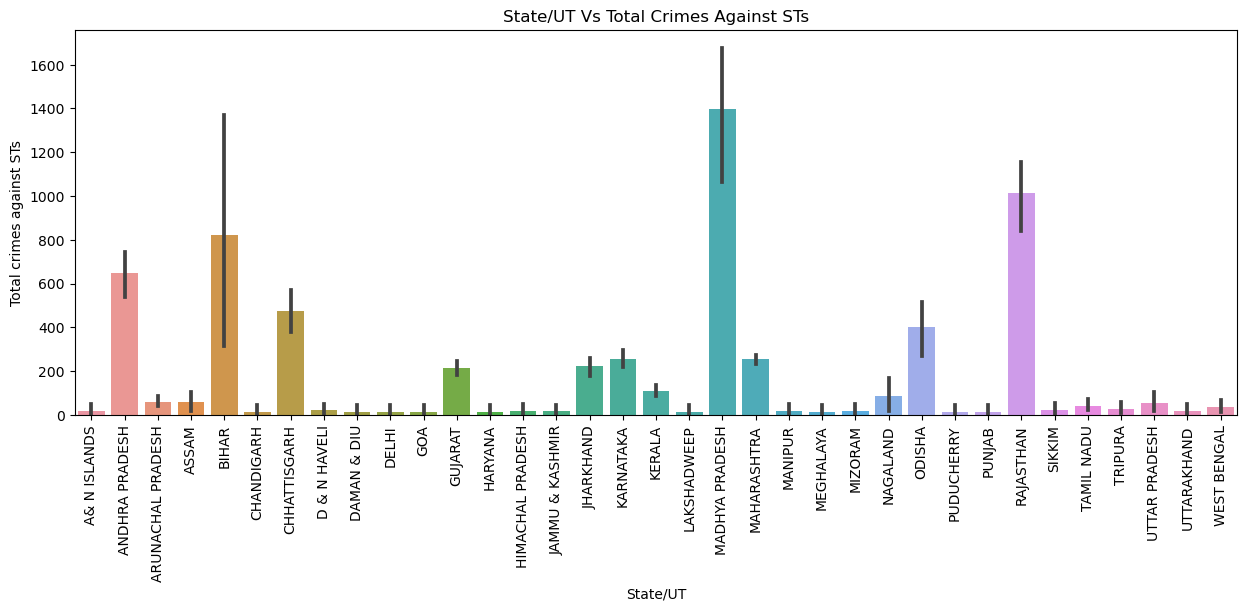

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total crimes against STs'])
plt.xticks(rotation= 90)
plt.title('State/UT Vs Total Crimes Against STs')
plt.savefig("5.jpg")
plt.show()

Madhya Pradesh , rajasthan Has higher crimes against STs and Manipur, A & N Island has lowest crimes against STs.

### State/UT Vs Total Crimes Against Children

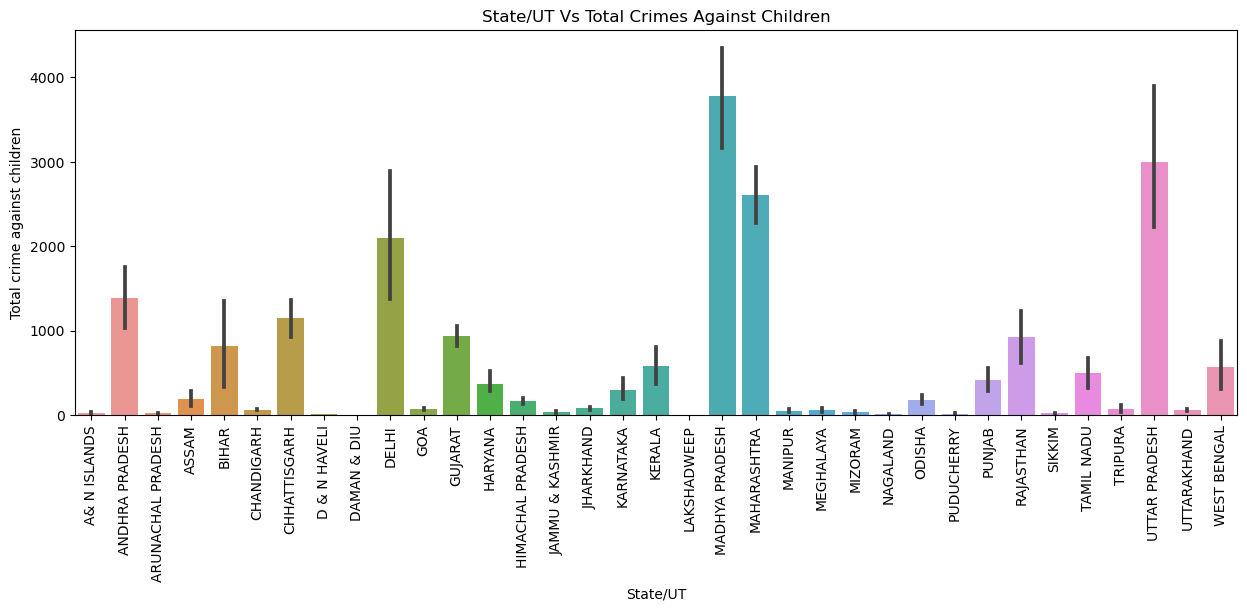

In [25]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total crime against children'])
plt.xticks(rotation=90)
plt.title('State/UT Vs Total Crimes Against Children')
plt.savefig("6.jpg")
plt.show()

MP, UP, maharastra has the Highest Crimes against Children while D & N Haveli, Daman,& Diu , LAKSHADWEEP has the lowest Crimes against Children

### Overall Crime Against Women vs. State/UT

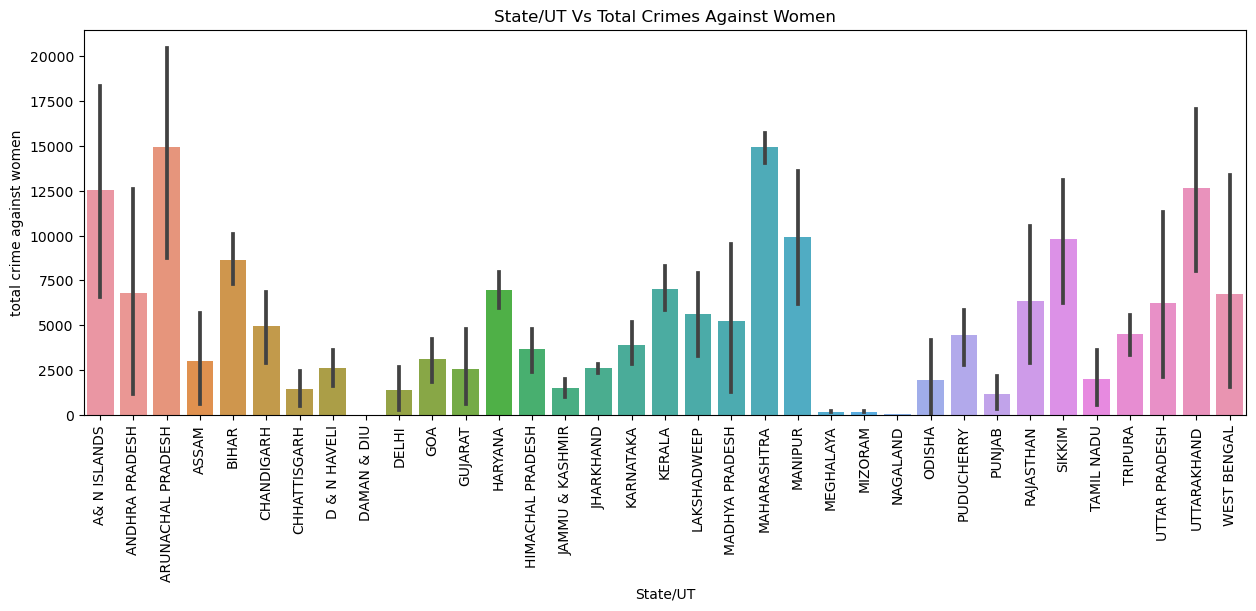

In [26]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['total crime against women'])
plt.xticks(rotation= 90 )
plt.title('State/UT Vs Total Crimes Against Women')
plt.savefig("7.jpg")
plt.show()

Mizoram and Meghalya are the only states which has lesser crime against women and Nagaland has almost 0 crimes against Women.

Other states have more crimes against Women.


### Year vs Litearcy Rate

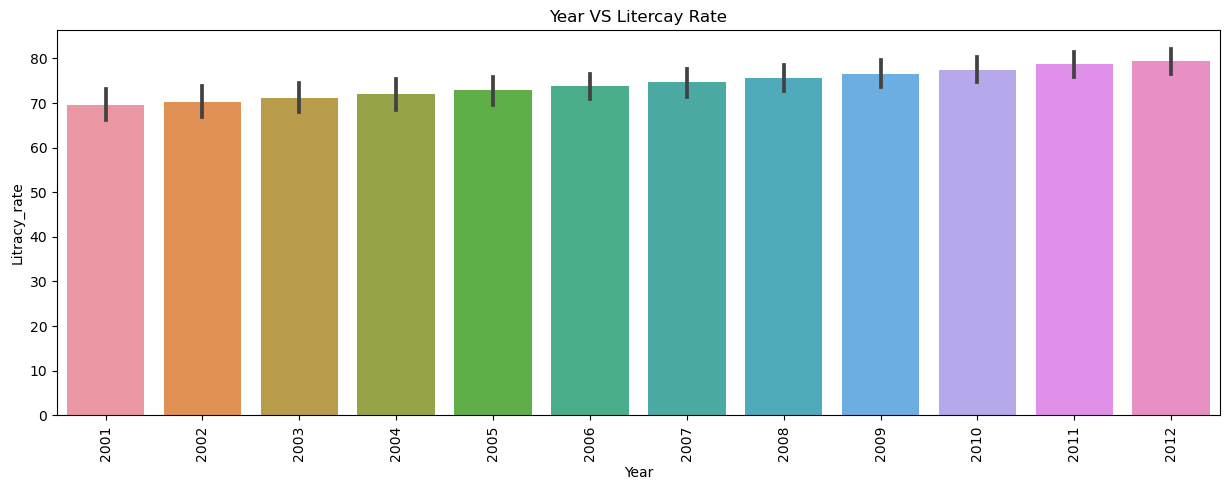

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Litracy_rate'])
plt.xticks(rotation= 90)
plt.title('Year VS Litercay Rate')
plt.savefig("8.jpg")
plt.show()

Litearcy rate has been increase from 2001 to 2012

### Year Vs Population Literacy

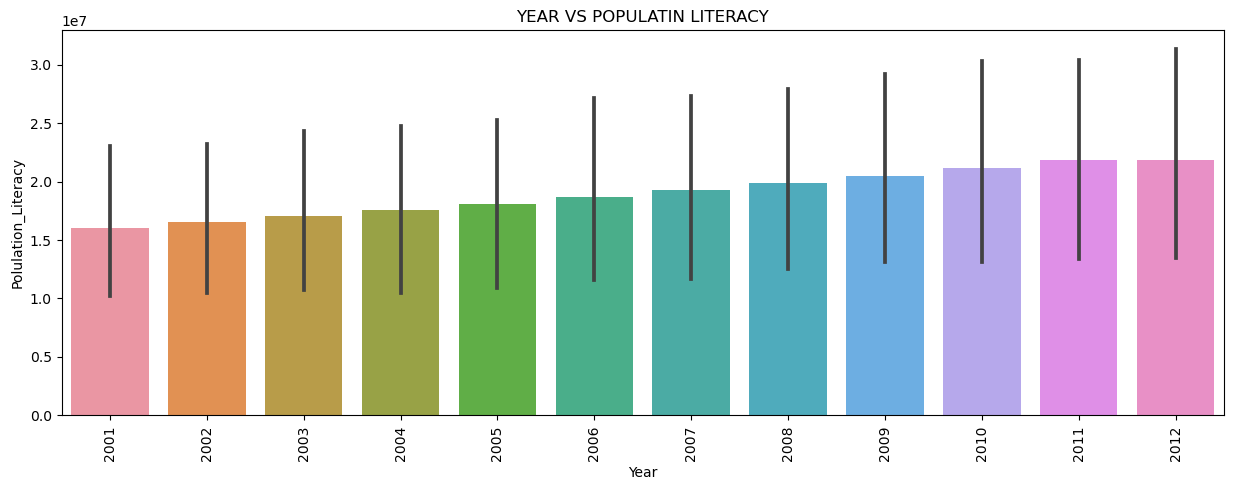

In [28]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Polulation_Literacy'])
plt.xticks(rotation= 90 )
plt.title('YEAR VS POPULATIN LITERACY')
plt.savefig("9.jpg")
plt.show()


### Year Vs Male Literacy

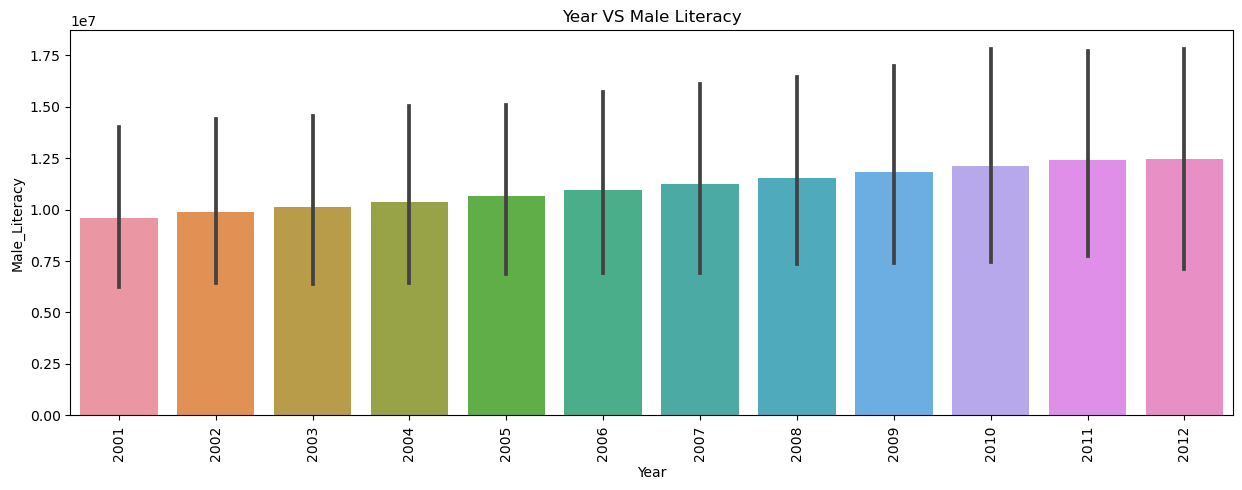

In [29]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Male_Literacy'])
plt.xticks(rotation=90)
plt.title('Year VS Male Literacy')
plt.savefig("10.jpg")
plt.show()

### Year Vs Female Literacy

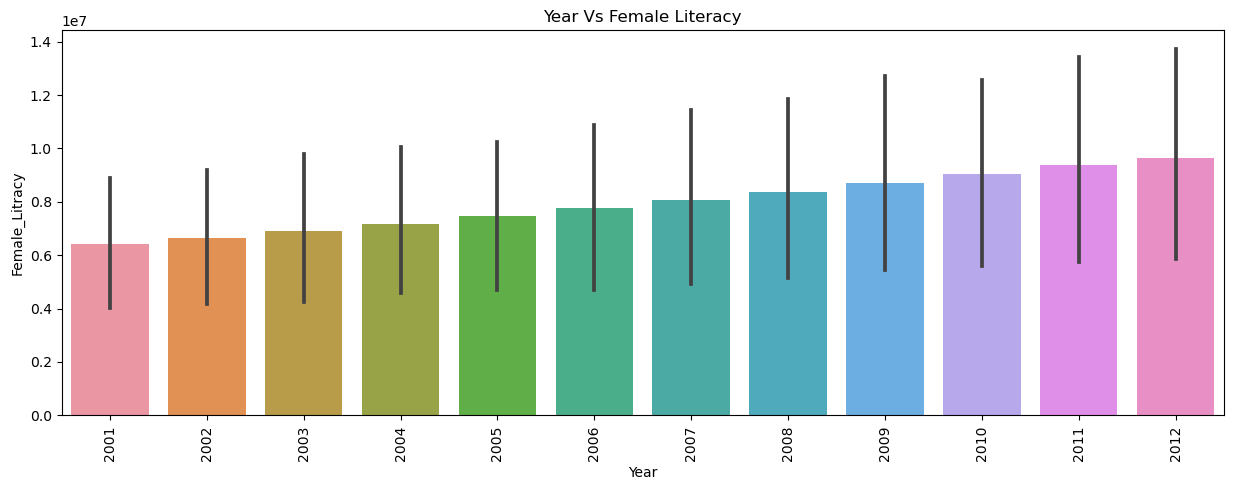

In [30]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Female_Litracy'])
plt.xticks(rotation=90)
plt.title('Year Vs Female Literacy')
plt.savefig("11.jpg")
plt.show()

### Population VS Litercay

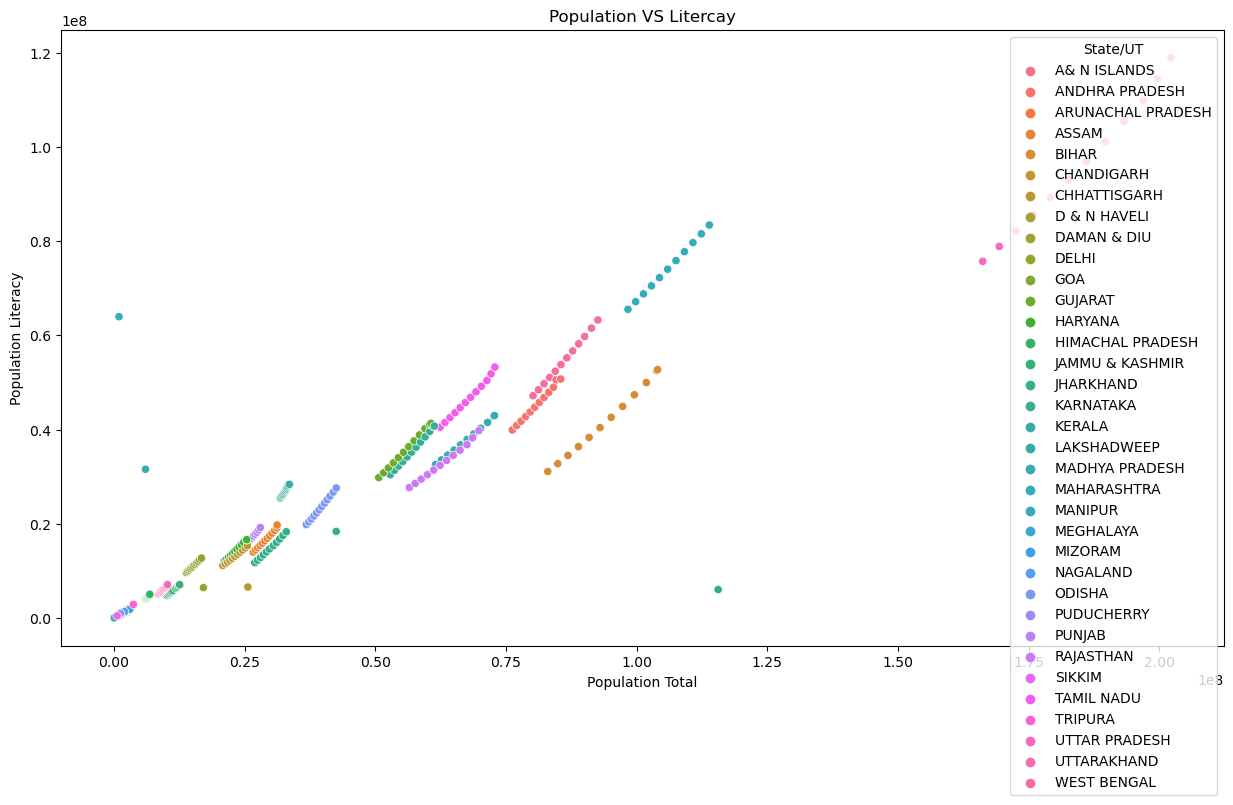

In [31]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['population(total)'], y=df['Polulation_Literacy'],hue=df['State/UT'])
plt.xlabel('Population Total')
plt.ylabel('Population Literacy')
plt.title('Population VS Litercay')
plt.savefig("11.jpg")
plt.show()

In the above scatter shows that when population is increasing , literacy is also incresing in every state and UT.

### EDA(Exploratory Data Analysis)

#### 2.1: Analyzing Total Crimes and Literacy Rate.

In [32]:
new_df=df[['State/UT','Year','Litracy_rate', 'Total Crimes', 'tot_crimes_sc', 'total crime against women',
       'Total crimes against STs','Total crime against children']]
new_df

State/UT  Year  Litracy_rate  Total Crimes  tot_crimes_sc  \
0         A& N ISLANDS  2001         81.30          1386              0   
1       ANDHRA PRADESH  2001         60.47        278982           2933   
2    ARUNACHAL PRADESH  2001         54.34          5243              0   
3                ASSAM  2001         63.25         81418              6   
4                BIHAR  2001         47.00        189612           1303   
..                 ...   ...           ...           ...            ...   
415         TAMIL NADU  2012         80.88        415626           1647   
416            TRIPURA  2012         80.89         13461             76   
417      UTTAR PRADESH  2012         67.98        444403           6202   
418        UTTARAKHAND  2012         79.22         20122             33   
419        WEST BENGAL  2012         76.88        353008             85   

     total crime against women  Total crimes against STs  \
0                         34.0                       1.0   
1                      13669.0                     512.0   
2                        180.0                      72.0   
3                       4048.0                       0.0   
4                       4489.0                      83.0   
..                         ...                       ...   
415                     6381.0                      27.0   
416                     1559.0                      29.0   
417                    23033.0                      44.0   
418                     1055.0                       3.0   
419                    30585.0                      91.0   

     Total crime against children  
0                             0.0  
1                           270.0  
2                             0.0  
3                            18.0  
4                            83.0  
..                            ...  
415                        1036.0  
416                          20.0  
417                        6033.0  
418                         122.0  
419                        1706.0  

[420 rows x 8 columns]

In [33]:
new_df.corr()

Year  Litracy_rate  Total Crimes  \
Year                          1.000000      0.314890      0.094007   
Litracy_rate                  0.314890      1.000000     -0.167573   
Total Crimes                  0.094007     -0.167573      1.000000   
tot_crimes_sc                 0.048076     -0.163993      0.242294   
total crime against women     0.150851     -0.011096      0.155126   
Total crimes against STs      0.060426     -0.253828      0.547101   
Total crime against children  0.229476      0.014062      0.728111   

                              tot_crimes_sc  total crime against women  \
Year                               0.048076                   0.150851   
Litracy_rate                      -0.163993                  -0.011096   
Total Crimes                       0.242294                   0.155126   
tot_crimes_sc                      1.000000                   0.035324   
total crime against women          0.035324                   1.000000   
Total crimes against STs           0.359817                   0.095342   
Total crime against children       0.084627                   0.176379   

                              Total crimes against STs  \
Year                                          0.060426   
Litracy_rate                                 -0.253828   
Total Crimes                                  0.547101   
tot_crimes_sc                                 0.359817   
total crime against women                     0.095342   
Total crimes against STs                      1.000000   
Total crime against children                  0.484496   

                              Total crime against children  
Year                                              0.229476  
Litracy_rate                                      0.014062  
Total Crimes                                      0.728111  
tot_crimes_sc                                     0.084627  
total crime against women                         0.176379  
Total crimes against STs                          0.484496  
Total crime against children                      1.000000

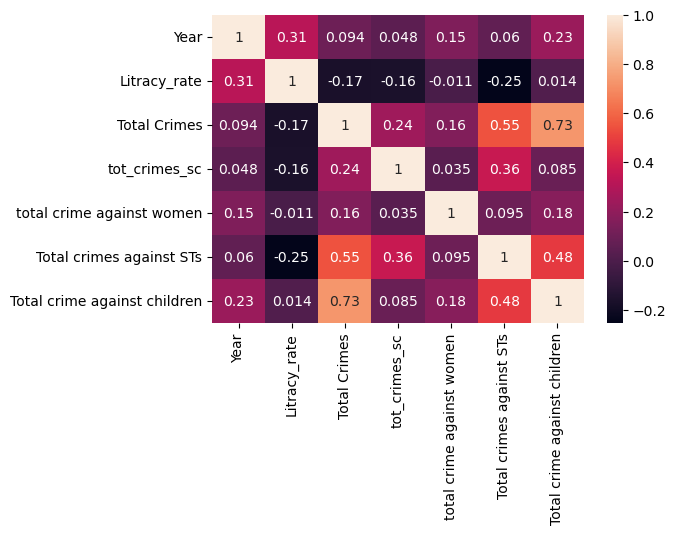

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(new_df.corr(),annot=True)
plt.savefig('heatmap1.jpg')
plt.show()


There are a few feature columns with highly positive and negative correlations that raise concern about multicollinearity.  If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

The Total Crimes, "total_crimes_sc," "total crime against women," "total crimes against STs," and "total crime against children" are negatively correlated with Literacy_rate.

In [35]:
import plotly.io as pio
pio.renderers.default = 'svg'


import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

### Literacy rate VS Total Crimes

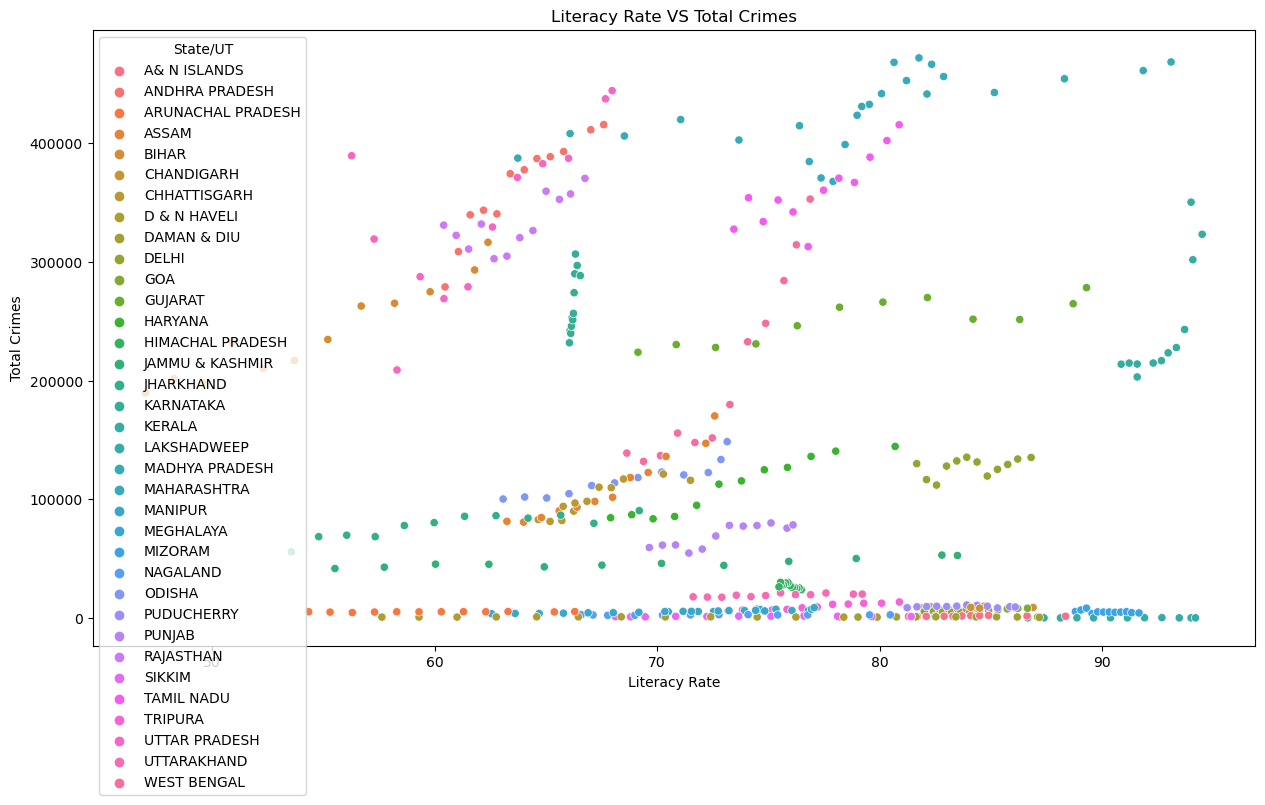

In [36]:
#plotting scatter plot

plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Litracy_rate'], y=df['Total Crimes'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.title('Literacy Rate VS Total Crimes')
plt.savefig("12.jpg")
plt.show()


We can see Literacy_rate VS Total Crimes for every state here

From the above scatter plot its clear that Higher the Literacy rate lower the Total Crimes would be.

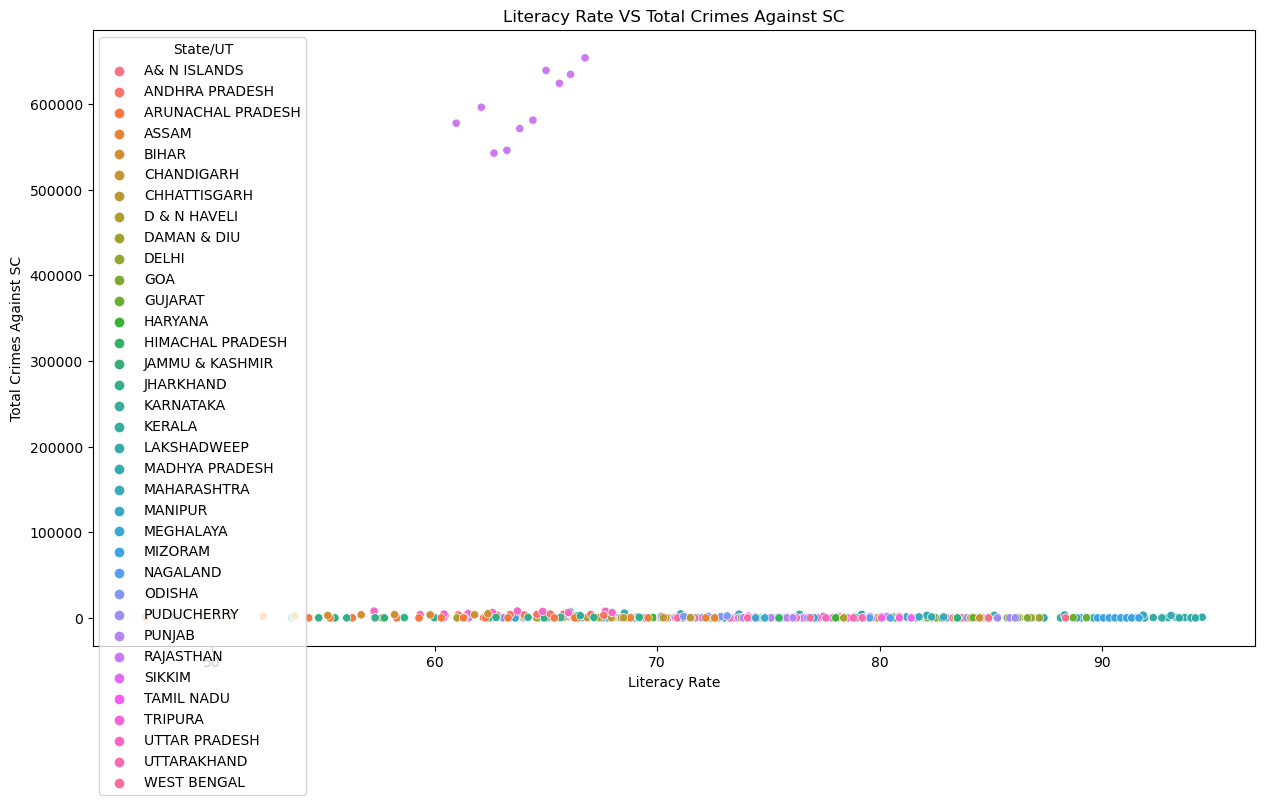

In [37]:
## Ratio of Literacy Rate VS Total Crimes Against SC

plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Litracy_rate'], y=df['tot_crimes_sc'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against SC')
plt.title('Literacy Rate VS Total Crimes Against SC')
plt.savefig("13.jpg")
plt.show()

from this above scatterplot we can clearly see if Litercay Rate keep on increasing, there is decline in the total crimes sc

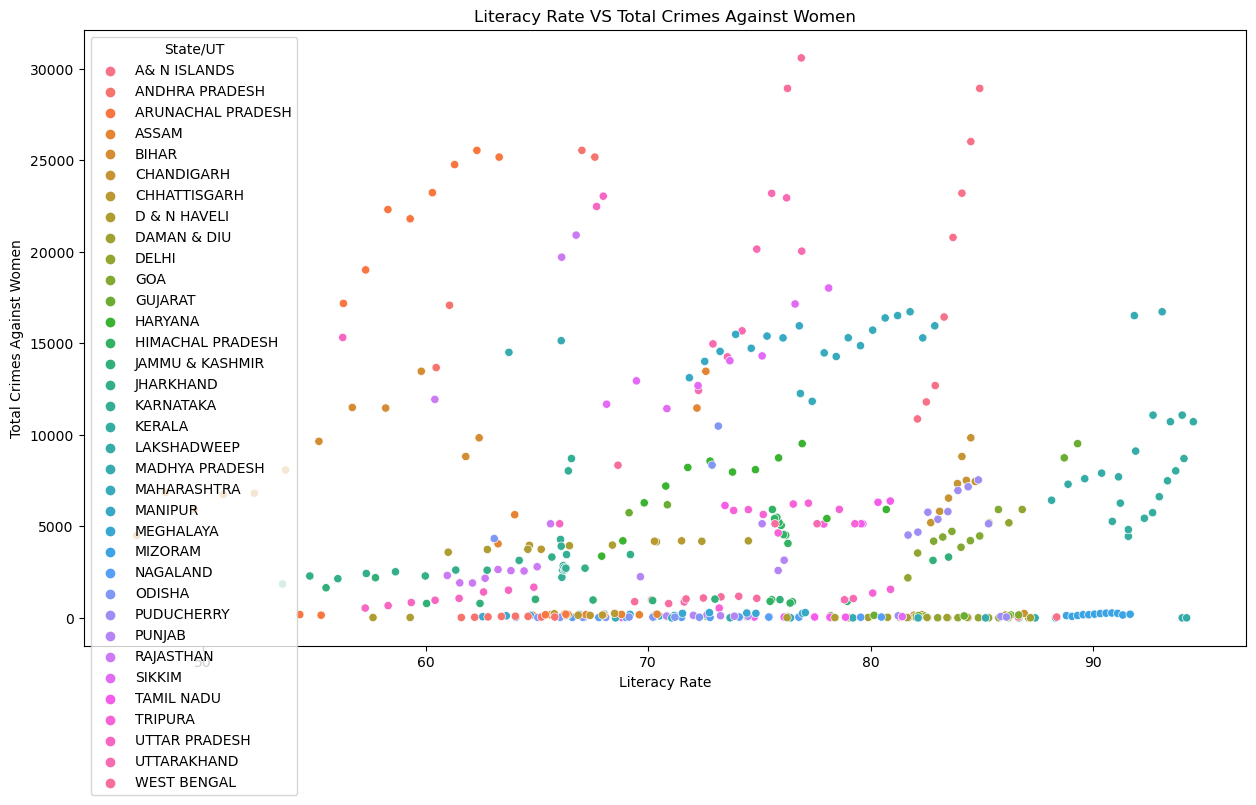

In [38]:
# Literacy Rate VS Total Crimes Against Women
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Litracy_rate'], y=df['total crime against women'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against Women')
plt.title('Literacy Rate VS Total Crimes Against Women')
plt.savefig("14.jpg")
plt.show()


 literacy rate increased then overall rate of crime against women is decrease.

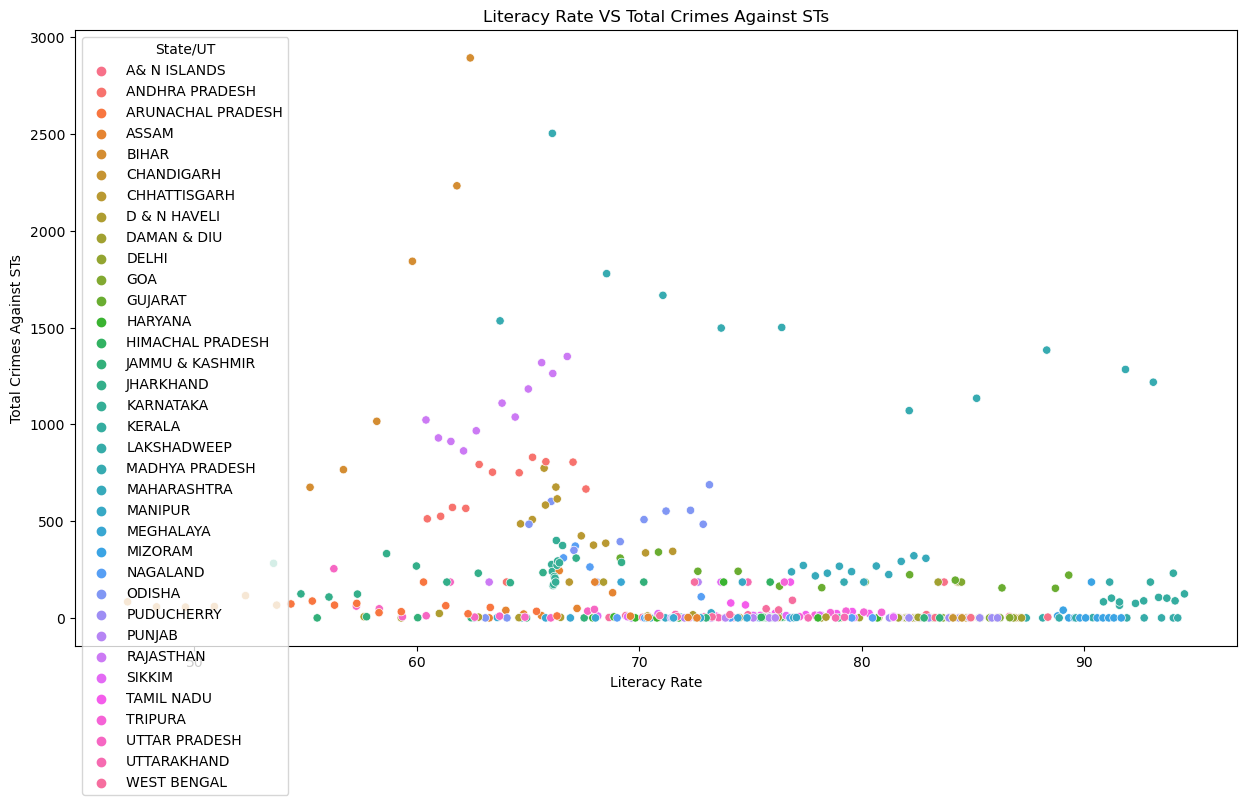

In [39]:
# sctter plot for Literacy Rate VS Total Crimes Against STs

plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Litracy_rate'], y=df['Total crimes against STs'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against STs')
plt.title('Literacy Rate VS Total Crimes Against STs')
plt.savefig("15.jpg")
plt.show()


Total crimes against STs has a negative correlation with Literacy_rate.

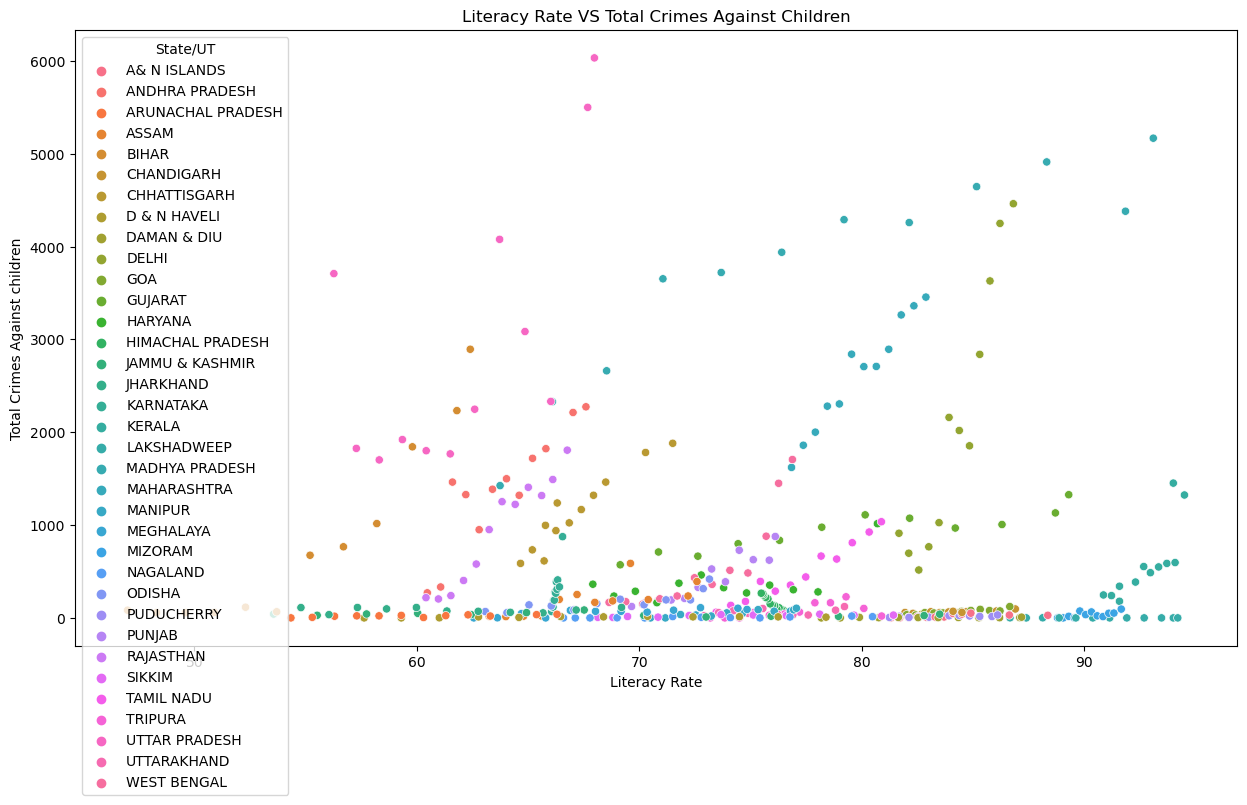

In [40]:
# scatter plot for Literacy Rate VS Total Crimes Against Children
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Litracy_rate'], y=df['Total crime against children'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against children')
plt.title('Literacy Rate VS Total Crimes Against Children')
plt.savefig("16.jpg")

plt.show()


Literacy_rate is negatively correlated with Total crimes against children.

## 2.2 Analysis of the type of crime vs each state vs Literacy rate.


### State Vs MURDER Vs Litercay Rate

In [41]:
# pip install -U kaleido

In [42]:
fig = px.scatter(df, x="Litracy_rate", y="MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  trendline='ols',template="simple_white")
fig.show()

 we can see that State has higher Litercay rate then the count of MURDER cases decresing

### Every State Vs Literacy Rate Vs Murder Crime Attempt

In [43]:
fig = px.scatter(df, x="Litracy_rate", y="ATTEMPT TO MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  trendline='ols',template="simple_white")
fig.show()

We can select /Deselect the State and observe the pattern here for any state/UT.

UTTAR PRADESH has the highest number f ATTEMP TO MURDER CASES(7964 with LIT_rate 56.2)

Lakshdweep State has zero ATTEMP TO MURDER CASES with Literacy 94.2 which is th highest for mentioned states.

### Each State Vs Rape Vs Literacy_Rate

In [44]:
fig = px.scatter(df, x="Litracy_rate", y="RAPE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

MP has Highest Number of Rape cases while Lakshdweep has Lowest Rape Cases its Zero

### Each State Vs CULPABLE HOMICIDE NOT AMOUNTING TO MURDER Vs Literacy_Rate

In [45]:
fig = px.scatter(df, x="Litracy_rate", y="CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Only UP has the CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases around 1418 and states likes AP, Tripura,SIKKIM,Lakshdeep has minim CULPABLE HOMICIDE NOT AMOUNTING TO MURDER like 3,6,0 etc

### State Vs Literacy Rate Vs Crime Type(CUSTODIAL RAPE)

In [46]:
fig = px.scatter(df, x="Litracy_rate", y="CUSTODIAL RAPE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Kerala with 94 Litracy rate has 0 Custodial rape__

Assam with 70 Litracy Rate has 5 Custodial Rape which was MAximum in the category of Custodial Rape__

### Each State VS Literacy Rate VS Type of crime(KIDNAPPING & ABDUCTION)

In [47]:
fig = px.scatter(df, x="Litracy_rate", y="KIDNAPPING & ABDUCTION", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Top 3 states for KIDNAPPING & ABDUCTION cases are Uttar Pradesh, West Bengal and BIHAR

Top 2 states with lowest number of auto theft cases Sikkim, Mizoram.

### Each state vs Literacy Rate VS type of Crime(KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)

In [48]:
fig = px.scatter(df, x="Litracy_rate", y="KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Uttar Pradesh has highest nmber of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS cases 7910 and Lakshdeep has 0 KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS cases

### Each state vs Literacy Rate VS type of crime(DACOITY)

In [49]:
fig = px.scatter(df, x="Litracy_rate", y="DACOITY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Bihar ,UTTAR PRADESH, and MAharshtra are the top 3 states with highest Daocity cases.

Tripura, Sikkim , MAnipur has the lowset daocity cases..

### Each state VS Lit rate VS Type of Crime(ROBBERY)

In [50]:
fig = px.scatter(df, x="Litracy_rate", y="ROBBERY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Maharashtra state has 6949 cases and Laksdweep ha 0 Robbery cases

### Each state VS Lit Rate VS Type of Crime(BURGLARY)

In [51]:
fig = px.scatter(df, x="Litracy_rate", y="BURGLARY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Maharashta has around 15000 cases of BURGLARY and Lakshdweep has 3 BURGLARY cases

### Each State VS Lit rate VS Type of Crime(THEFT)

In [52]:
fig = px.scatter(df, x="Litracy_rate", y="THEFT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Maharashtra has around 50K (highest)cases of THEFT and Lakshdweep has 7(Lowest) cases of THEFT.

### Each State VSLit rate VS Type of Crime(AUTO THEFT)

In [53]:
fig = px.scatter(df, x="Litracy_rate", y="AUTO THEFT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Uttar Pradesh has 22000(highest)AUTO THEFT cases where else Laksdweep has 1 AUTO THEFT caseswhich is the Lowest

### Each state VS Lit rate VS Type of Crime(RIOTS)

In [54]:
fig = px.scatter(df, x="Litracy_rate", y="RIOTS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Mizoram(91.33 Litracy rate) has 0 (Lowest)Riots cases whie the Rajasthan(Lit rate 60.1) has 11.2K(highest) Caese of Riots which is the Highest

### Each State VS Litracy Rate VS Type of Crime(CRIMINAL BREACH OF TRUST)

In [55]:
fig = px.scatter(df, x="Litracy_rate", y="CRIMINAL BREACH OF TRUST", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()


UP has CRIMINAL BREACH OF TRUST caes around 4296(highest) and Laksdweep has 0 CRIMINAL BREACH OF TRUST

### Each State VS Lit rate VS Type of Crime(CHEATING)

In [56]:
fig = px.scatter(df, x="Litracy_rate", y="CHEATING", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

Rajasthan has highest cases of Cheating 19.46K and Lakshdweep has lowest cases 0

### Each state VS Lit rate vs Type of Crime(COUNTERFIETING)

In [57]:
fig = px.scatter(df, x="Litracy_rate", y="COUNTERFIETING", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

State Tamil Nadu has highest numbers of COUNTERFIETING cases 599 and Lkshdweep has 0 COUNTERFIETING cases.

### Each state VS Lit rate vs Type of Crime(ARSON)

In [58]:
fig = px.scatter(df, x="Litracy_rate", y="ARSON", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

State Assam has highest numbers of ARSON cases 2830 and Lkshdweep has 3 ARSON cases.

### Each state VS Lit rate vs Type of Crime(HURT/GREVIOUS HURT)

In [59]:
fig = px.scatter(df, x="Litracy_rate", y="HURT/GREVIOUS HURT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()


state Tamil Nadu has highest numbers of HURT/GREVIOUS HURT cases 56.7K and Lakshdweep has 1 HURT/GREVIOUS HURT cases.

### Each state VS Lit rate vs Type of Crime(DOWRY DEATHS)

In [60]:
fig = px.scatter(df, x="Litracy_rate", y="DOWRY DEATHS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

State Assam has highest numbers of Dowry Death 2322 cases 2830 and Lkshdweep has 0 Dowry Death cases.

### Each state VS Lit rate vs Type of Crime(INSULT TO MODESTY OF WOMEN)

In [61]:
fig = px.scatter(df, x="Litracy_rate", y="INSULT TO MODESTY OF WOMEN", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

State Uttar Pradesh has highest numbers of Insult to Modest of women 4970 cases 2830 and Lkshdweep has 0 Insult to Modest of women cases.

### Each state VS Lit rate vs Type of Crime(CRUELTY BY HUSBAND OR HIS RELATIVES)


In [62]:
fig = px.scatter(df, x="Litracy_rate", y="CRUELTY BY HUSBAND OR HIS RELATIVES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

State West Bengal has highest numbers of CRUELTY BY HUSBAND OR HIS RELATIVES 19.36K cases and Lkshdweep has 0 CRUELTY BY HUSBAND OR HIS RELATIVES

### Each state VS Lit rate vs Type of Crime(IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES)

In [63]:
fig = px.scatter(df, x="Litracy_rate", y="IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

State Bihar has 83 (highest) numbers of IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES cases 2830 and Lakshdweep,Kerala,Mizoram have 0 IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES cases.

### Each state VS Lit rate vs Type of Crime(CAUSING DEATH BY NEGLIGENCE)

In [64]:
fig = px.scatter(df, x="Litracy_rate", y="CAUSING DEATH BY NEGLIGENCE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()

State Tamil Nadu has 16.07K (highest) numbers of CAUSING DEATH BY NEGLIGENCE cases and Lakshdweep have 0 CAUSING DEATH BY NEGLIGENCE cases.

### Each state VS Lit rate vs Type of Crime(OTHER IPC CRIMES)

In [65]:
fig = px.scatter(df, x="Litracy_rate", y="OTHER IPC CRIMES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show()


State Tamil Nadu has 124.17K (highest) numbers of OTHER IPC Crimes cases and Lakshdweep have 5 OTHER IPC CRIMES cases

From Above analysis of each type of crime and Literacy rate and State/UT it is some how clear that Lakshdweep is the only UT which has Lowest crimes and Literacy rate is Quite good like its less than Kerla but Higher than most of the States/UT and has amost 0 crime rate .

# 2.3 Analysis of year-on-year total crime rate.

The following formula is used to determine the crime rate:

CR = TC/P − 100,000

where CR stands for crimes committed per 100,000 people.
The total number of crimes (TC) in a certain location
P is the area's total population.

In [67]:
#selecting d/f states/UT for analysis
df_states=df[['State/UT','Year','Crime Rate']]

In [68]:
# Making data set for different state
#Selecting A& N Island only
select_andman = df_states.loc[df['State/UT'] == 'A& N ISLANDS']
select_andhra = df_states.loc[df['State/UT'] == 'ANDHRA PRADESH']
select_arunachal = df_states.loc[df['State/UT'] == 'ARUNACHAL PRADESH']
select_assam4 = df_states.loc[df['State/UT'] == 'ASSAM'] 
select_bihar = df_states.loc[df['State/UT'] == 'BIHAR'] 
select_chandigarh = df_states.loc[df['State/UT'] == 'CHANDIGARH']
select_chhatisgarh = df_states.loc[df['State/UT'] == 'CHHATTISGARH']
select_haveli = df_states.loc[df['State/UT'] == 'D & N HAVELI']
select_daman = df_states.loc[df['State/UT'] == 'DAMAN & DIU']
select_delhi = df_states.loc[df['State/UT'] == 'DELHI']  
select_goa = df_states.loc[df['State/UT'] == 'GOA']
select_gujarat = df_states.loc[df['State/UT'] == 'GUJARAT']
select_haryana = df_states.loc[df['State/UT'] == 'HARYANA']
select_himachal = df_states.loc[df['State/UT'] == 'HIMACHAL PRADESH']
select_jk = df_states.loc[df['State/UT'] == 'JAMMU & KASHMIR']
select_jharkhand = df_states.loc[df['State/UT'] == 'JHARKHAND']
select_karnataka = df_states.loc[df['State/UT'] == 'KARNATAKA'] 
select_kerala= df_states.loc[df['State/UT'] == 'KERALA'] 
select_lakshdweep= df_states.loc[df['State/UT'] == 'LAKSHADWEEP']
select_mp= df_states.loc[df['State/UT'] == 'MADHYA PRADESH']
select_maharashtra = df_states.loc[df['State/UT'] == 'MAHARASHTRA']  
select_manipur= df_states.loc[df['State/UT'] == 'MANIPUR'] 
select_meghalaya = df_states.loc[df['State/UT'] == 'MEGHALAYA']
select_mizoram = df_states.loc[df['State/UT'] == 'MIZORAM'] 
select_nagaland= df_states.loc[df['State/UT'] == 'NAGALAND']
select_odisha= df_states.loc[df['State/UT'] == 'ODISHA']
select_puducherry = df_states.loc[df['State/UT'] == 'PUDUCHERRY']
select_punjab = df_states.loc[df['State/UT'] == 'PUNJAB']
select_rajasthan = df_states.loc[df['State/UT'] == 'RAJASTHAN']
select_sikkim = df_states.loc[df['State/UT'] == 'SIKKIM']
select_tamilnadu = df_states.loc[df['State/UT'] == 'TAMIL NADU']
select_tripura= df_states.loc[df['State/UT'] == 'TRIPURA']
select_up = df_states.loc[df['State/UT'] == 'UTTAR PRADESH']
select_uk= df_states.loc[df['State/UT'] == 'UTTARAKHAND']
select_wb= df_states.loc[df['State/UT'] == 'WEST BENGAL']


### Crime Rate Analysis of A & N Islands year wise

In [69]:
fig = px.line(select_andman, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

As per above line plot crime rate was lowest in 2002 and highest was in 2010 for A & N Islands

# Crime Rate Analysis of Andhra Pradesh year wise

In [70]:
fig = px.line(select_andhra, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

For Andhra Pradesh Crime rate was lowest in 2001 and highest was in 2012

# Crime Rate Analysis of Arunachal Pradesh year wise

In [71]:
fig = px.line(select_arunachal, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

As per above Line plot Arunachal Pradesh has Lowest crime rate in 2012 and highest in 2001 which is a good thing that means Crime is decrasing in this state.

# Crime Rate Analysis of Assam year wise

In [72]:
fig = px.line(select_assam4, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

As per above Line plot Assam has Hishest crime rate in 2012 and Lowest in 2001

# Crime Rate Analysis of Bihar year wise

In [73]:
fig = px.line(select_bihar, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

It is clear from above plot that Bihar has Increasing trend for Crime rate that means Crime rate is keep on increasing from 2001

In [74]:
fig = px.line(select_chandigarh, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Chandigarh Crime kept fluctauting from 2001 , Crime rate was highest in 2002 and lowest in 2003

# Crime Rate Analysis of Chhatisgarh year wise

In [75]:
fig = px.line(select_chhatisgarh, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Chaisgarh has Lowest crime rate recorded in 2003 and highest was in 2011

# Crime Rate Analysis of D & N Haveli year wise

In [76]:
fig = px.line(select_haveli, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Highest Crime rate was recorded in 2005 and lowest recorded in 2012

# Crime Rate Analysis of Daman & Diu year wise

In [77]:
fig = px.line(select_daman, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

The crime rate in Daman and Diu peaked in 2005 and has been declining ever since

### Analysis of Delhi's Crime Rate by Year


In [78]:
fig = px.line(select_delhi, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

The incidence of crime in Delhi peaked in 2001, fluctuated until 2008, and then declined in 2010.

### Analysis of Goa's Crime Rate by Year

In [79]:
fig = px.line(select_goa, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

The crime rate in Goa peaked in 2012 after reaching its lowest point in 2004.

### Analysis of Gujarat's Crime Rate by Year

In [80]:
fig = px.line(select_gujarat, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()


The year 2007 saw the highest crime rate in Gujarat, while the year 2010 saw the lowest.

### Analysis of HARYANA's Crime Rate by Year

In [81]:
fig = px.line(select_haryana, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Since 2004, Haryana's crime rate has continued to rise.

### Analysis of Himachal Pradesh's Crime Rate by years

In [82]:
fig = px.line(select_himachal, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Himachal Pradesh's crime rate peaked in 2007 and reached its lowest point in 2012.

### Analysis of JAMMU and KASHMIR's crime rates by Year

In [83]:
fig = px.line(select_jk, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

In Jammu & Kashmir  crime was low 2007.

### Crime Rate Analysis of JHARKHAND year wise

In [84]:
fig = px.line(select_jharkhand, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

 Crime rate was lowest in 2001 and Highest in 2007

### Crime Rate Analysis of Karnataka year wise

In [85]:
fig = px.line(select_karnataka, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

In Karnataka 2001 has less crime rate and year 2010  has highest crime rate.

### Crime Rate Analysis of Karala year wise

In [86]:
fig = px.line(select_kerala, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

The crime rate decreased until 2009, at which point it increased and reached its peak in 2011.

### Lakshdweep Crime rate yearly analysis

In [87]:
fig = px.line(select_lakshdweep, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

crime rates in Lakshadweep peaked in 2007 after declining in 2001.

### For MadhyaPradesh Crime Rate Analysis Yearly


In [88]:
fig = px.line(select_mp, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

MP State has highest crime rate in 2001 andfrom 2002 it decresed.


### Maharashtra Crime Rate Analysis Year wise


In [89]:
fig = px.line(select_maharashtra, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Maharashtra Had lowest crime rate since 2002 till 2012

### Manipur Crime rate Analysis year wise

In [90]:
fig = px.line(select_manipur, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Manipur has lowest Crime rate in 2010 and highest in 2008

### Meghalaya Crime rate Analysis Year wise

In [91]:
fig = px.line(select_meghalaya, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Meghayala state had lowest crime rate in 2003 and highest was in 2011

### Mizoram Crime Rate Analysis Year wise

In [92]:
fig = px.line(select_mizoram, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Mizoram lowest crime rate was in 2012 and highest was in 2003

### Nagaland Crime Rate Analysis Year wise

In [93]:
fig = px.line(select_nagaland, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Nagaland crime rate was lowest in 2003 and highest was in 2001

### Odisha Crime rate Analysis year wise

In [94]:
fig = px.line(select_odisha, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Odisha crime rate was highest in 2012 and lowest was in 2003

### Puduchery Crime rate Analysis

In [95]:
fig = px.line(select_puducherry, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Puducherry had lowest crime rate was in 2010 and highest was in 2007

### Punjab Crime rate Analysis Year wise

In [96]:
fig = px.line(select_punjab, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Crime rate of Punjab was lowest in 2004 and highest was in 2007

### Rajasthan Crime rate Analysis Year wise

In [97]:
fig = px.line(select_rajasthan, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Crime rate of Rajasthan was in 2005 and hghest was in 2001


### Sikkim Crime Rate Analysis Year wise


In [98]:
fig = px.line(select_sikkim, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Crime rate of Sikkim was in 2003 and highest was in 2008.

### Tamil Nadu Crime Rate Analyss year wise

In [99]:
fig = px.line(select_tamilnadu, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Tamil Nadu crime rate was highest in 2012 and lowest was in 2006


### Tripura Crime rate analysis Yearwise

In [100]:
fig = px.line(select_tripura, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Crime rate of Tripura was in 2001 lowest and highest was in 2012

### Uttar Pradesh Crime rate Analysis Year wise

In [101]:
fig = px.line(select_up, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Uttar Pradesh had lowest crime rate was in 2003 and highest was in 2001


### Uttarakhand Crime Rate Analysis Year wise

In [102]:
fig = px.line(select_uk, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Uttarakhand state had lowest crime rate was in 2012 and highest was in 2007

### West Bengal Crime Rtae Analysis Year wise

In [103]:
fig = px.line(select_wb, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show()

Crime rate of West Bengal keep on increasing since 2006 and 2002 was the year when crime rate was lowest

# 2.4 Analysis of area vs overall crime

In [104]:
df_area=df.groupby('Area (km2)').min()

In [105]:
dfarea=pd.pivot_table(df, values ='Area (km2)', index =['State/UT','Year','Total Crimes'],
                          aggfunc = max)
dfarea


Area (km2)
State/UT     Year Total Crimes            
A& N ISLANDS 2001 1386                8249
             2002 1269                8249
             2003 1352                8249
             2004 1612                8249
             2005 1462                8249
...                                    ...
WEST BENGAL  2008 232767             88752
             2009 248291             88752
             2010 284277             88752
             2011 314488             88752
             2012 353008             88752

[420 rows x 1 columns]

In [106]:
df_area=df[['State/UT','Year','Total Crimes','Area (km2)']]
df_area

State/UT  Year  Total Crimes  Area (km2)
0         A& N ISLANDS  2001          1386        8249
1       ANDHRA PRADESH  2001        278982      275045
2    ARUNACHAL PRADESH  2001          5243       83743
3                ASSAM  2001         81418       78438
4                BIHAR  2001        189612       94163
..                 ...   ...           ...         ...
415         TAMIL NADU  2012        415626      130058
416            TRIPURA  2012         13461       10486
417      UTTAR PRADESH  2012        444403      240928
418        UTTARAKHAND  2012         20122       53483
419        WEST BENGAL  2012        353008       88752

[420 rows x 4 columns]

In [108]:
fig = px.scatter(df_area, x="Area (km2)", y="Total Crimes", size="Area (km2)",color='State/UT',
                  size_max=20)
fig.show()


Above Scatter plot is showing us the Area VS Total Crimes.Since the Area will remain the same so the size of the circle are equal for every state Area Correspondingly.Diffrent Color showing the different State/UT and Tota Crimes on y-axis.

Observations:

From above representaion its is clear that smaller the Area of the state lesser Total Crimes would be. For example Lakshdweep Area is 72 KM2 and Total crimes are only 127 which is showing afetr hovering over the Lakshdweep circle

Similarly with Puducherry state Area-479km2 and Total Crimes 9252.

The Area of Rajasthan state is 342239(Largest) Km2 and Total Crime are like 370.502K

While the Uttar Pradesh has 240928 km2 area and Total Crimes are 444.403K Total Crimes which is the Highest

# 2.5	Analysis of Population vs overall Crime.

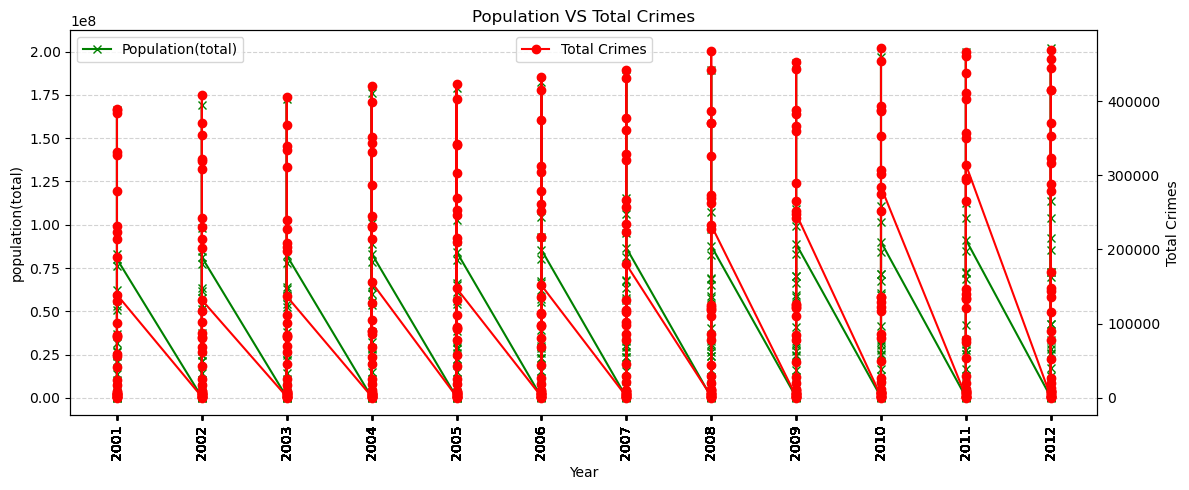

In [109]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Population VS Total Crimes')
ax.set_xlabel('Year')



ax.plot(df['Year'],df['population(total)'], color='green', marker='x')
ax2.plot(df['Year'],df['Total Crimes'], color='red', marker='o')



ax.set_ylabel('population(total)')
ax2.set_ylabel('Total Crimes')
ax.legend(['Population(total)'])
ax2.legend(['Total Crimes'], loc='upper center')
ax.set_xticks(df['Year'])
ax.set_xticklabels(df['Year'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.savefig('18.jpg')

plt.tight_layout()
plt.show()

In above line plot we can Clearly see that More the population chances of Crimes would be higher. x axis showing population increament year wise correspondigly increament in Total Crimes. y-axis on lefy side showing Population data and Y axis on right side shwoing Total crimes.

Population is one of the important factors influencing incidence of crime. A number of socio-economic factors, besides population, could influence the crime situation at a particular place.

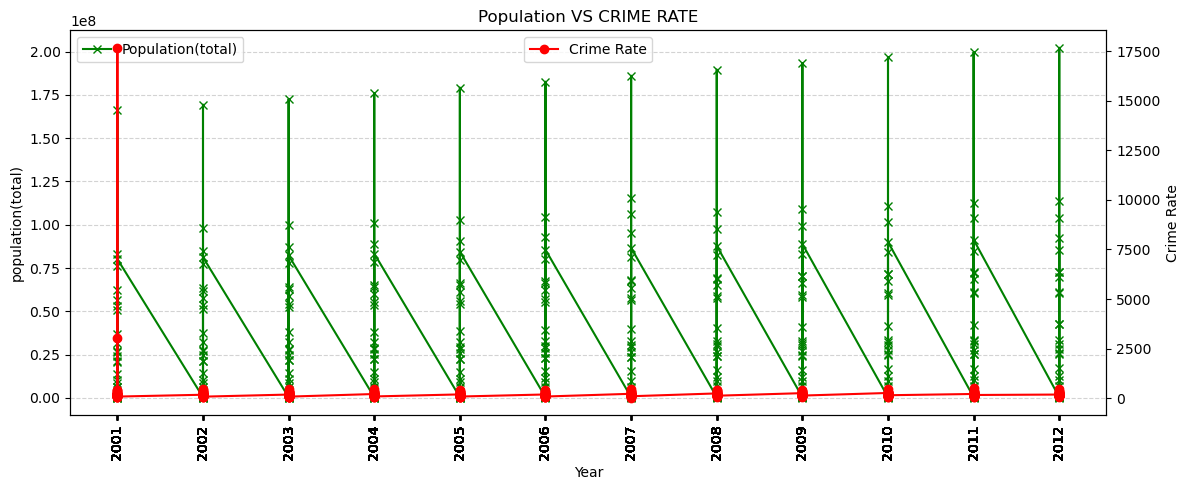

In [110]:
ig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Population VS CRIME RATE')
ax.set_xlabel('Year')


plt.savefig('19.jpg')

ax.plot(df['Year'],df['population(total)'], color='green', marker='x')
ax2.plot(df['Year'],df['Crime Rate'], color='red', marker='o')



ax.set_ylabel('population(total)')
ax2.set_ylabel('Crime Rate')
ax.legend(['Population(total)'])
ax2.legend(['Crime Rate'], loc='upper center')
ax.set_xticks(df['Year'])
ax.set_xticklabels(df['Year'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.savefig('20.jpg')


plt.tight_layout()
plt.show()

# 2.6	Each state crime report. There is no fixed format to write a      report, you can write a report inside the notebook itself based on what you have analyzed in the above points.



In [111]:
tc= df.groupby("State/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending = False)
print("Crime by Each state:\n",tc)

Crime by Each state:
 State/UT
MADHYA PRADESH       2413770
MAHARASHTRA          2273436
TAMIL NADU           2060176
ANDHRA PRADESH       2018981
UTTAR PRADESH        1858074
RAJASTHAN            1855916
KARNATAKA            1481063
KERALA               1437459
GUJARAT              1385775
BIHAR                1346293
WEST BENGAL          1119304
ODISHA                647946
DELHI                 633174
ASSAM                 597764
HARYANA               595303
CHHATTISGARH          561027
JHARKHAND             422351
PUNJAB                384131
JAMMU & KASHMIR       259155
HIMACHAL PRADESH      154948
UTTARAKHAND           103204
PUDUCHERRY             54116
TRIPURA                52734
CHANDIGARH             40807
MANIPUR                35072
GOA                    32051
ARUNACHAL PRADESH      27652
MIZORAM                26146
MEGHALAYA              25249
NAGALAND               13133
A& N ISLANDS            9102
SIKKIM                  7000
D & N HAVELI            4651
DAMAN & DIU 

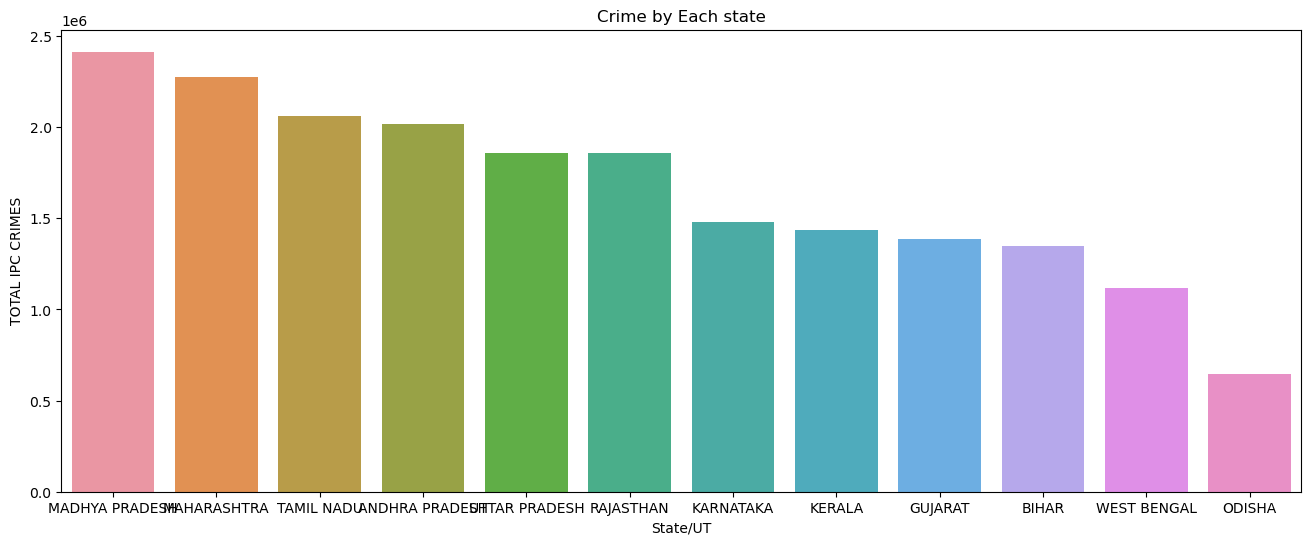

In [112]:
plt.figure(figsize=(16,6))
sns.barplot(x = tc.index[:12], y = tc[:12]).set(title = "Crime by Each state")
plt.savefig('crimebyeachstate.jpg')
plt.show()

From Above Bar plot we can see Top 12 states which have higher IPC Crimes - TOP 3 States are Madhya Pradesh, Maharashtra and Tamil Nadu.

In [113]:
tcr= df.groupby("State/UT")["Crime Rate"].sum().sort_values(ascending = False)
print("Crime  Rate  of Each state:\n",tcr)

Crime  Rate  of Each state:
 State/UT
MAHARASHTRA          19655.285754
MADHYA PRADESH        6316.673756
PUDUCHERRY            4869.180671
KERALA                4385.598206
CHANDIGARH            4155.725611
DELHI                 4126.855153
TAMIL NADU            3037.821579
RAJASTHAN             2946.820293
MIZORAM               2661.527940
KARNATAKA             2578.819811
HARYANA               2532.205598
ANDHRA PRADESH        2488.914059
GUJARAT               2478.217328
A& N ISLANDS          2457.210401
CHHATTISGARH          2389.783310
HIMACHAL PRADESH      2386.476742
DAMAN & DIU           2324.749802
GOA                   2276.257698
ARUNACHAL PRADESH     2227.536009
JAMMU & KASHMIR       2100.831570
ASSAM                 2035.844909
D & N HAVELI          1675.369068
ODISHA                1633.077477
TRIPURA               1509.964138
PUNJAB                1463.824145
MANIPUR               1453.769068
BIHAR                 1422.610111
JHARKHAND             1370.455004
WEST BENGA

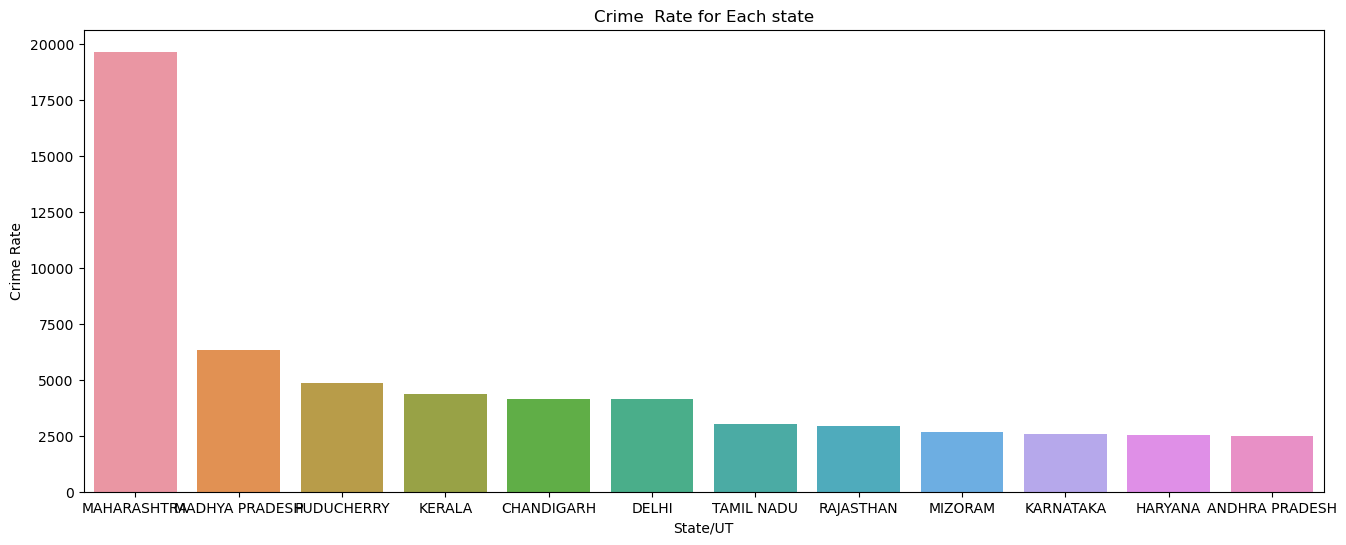

In [114]:
plt.figure(figsize=(16,6))
sns.barplot(x = tcr.index[:12], y = tcr[:12]).set(title = "Crime  Rate for Each state")
plt.savefig('crimeratestate.jpg')
plt.show()

Maharashtra State is the one which i having the highest crime rate and Nagaland is the state which ahs lowest crime rate

A & N ISLANDS- In 2001 Andaman had 184.75 Crime Rate which got declined in 2012 as population got increased and it was highest in 2009 (250.04 Crime Rate).Its Area is 8249 KM2.  

ANDHRA PRADESH- Total IPC crimes were 2018981in 2012 in which that population were highest too.

ARUNACHAL PRADESH- with count of Total IPC Crimes 27652 – on population of 1407014 which make s crime rate of 171.

ASSAM- 597764 with total IPC crimes Assam state comes at 14th position.

BIHAR- 1346293 Total IPC crimes comes at 10th position.

CHANDIGARH- 40807 total ipc crimes is less populated and crimes are less heer as comare to ither state /UTs.

CHHATTISGARH-with total ipc crimes 561027 Chhatisgarh comes at 15th position.

D & N HAVELI- Being an UT with an area of 491 km square has only 4651 total IPC crimes in the san of 11 years.

DAMAN & DIU- Its also an UT which has less area and crimes are 4651 , with an area of 12 km square it means leeser the area , less populated and less crimes.

DELHI – Being the Capital of India , Delhi has 633174 crime count in the span of 2001 to 2012. Delhi is wast in area wise 16579 km2 which is large in size.

GOA- with an area of 3702 km2 , Goa is the smalles state of India also it has 32051 count of crime , which has happened in the span of 11 years.(2001 to 2012).

GUJARAT – is the hub for textile business , and it has crimes 1385775 and it comes at 8th position.

HARYANA – 595303 total ipc crimes happened in the duration of 11 year it is 44212 km2 spread and it has 245 crime rate per capita.

HIMACHAL PRADESH – 154948 crimes were happened in the duration of 11 years (2001-2012).

JAMMU & KASHMIR – 259155 crimes were reported in the duration of 11 years (2001-2012).

JHARKHAND – 422351 crmes were reorted in the span of 11 years (2001 to 2012).

KARNATAKA -1481063 crimes were happened in the duration of 11 years with the population count of 61290592 that means it has crime rate of 214 (avg).

KERALA – Being the no.1 state in literacy – Kearala still has 1437459 total crime count in the span of 11 yaers.

LAKSHADWEEP – 743 the lowest crime count for any UT also its in small in area as well only 32 km square.

MADHYA PRADESH – is in the Top 3 states with higher crimes 2413770, also its large in area and Population wise as well.

MAHARASHTRA – 2nd State with highest crime with largest population and area covered.

MANIPUR- Small state and less populated as well.

MEGHALAYA – Small state and less populated.

MIZORAM – 1110132 count of Population and total Crimes are 35072.

NAGALAND – 13133 crimes were happened in the duration of 2001 to 2012.

ODISHA – 647946 crimes were happened in the duration of 11 years.

PUDUCHERRY-54116 total crimes were happened in the span of 1 years.

PUNJAB - 384131 crimes were happened in the duration of 11 years.

RAJASTHAN- In terms of area, the largest state in India is Rajasthan.It covers an area of over 342,000 square kilometers.

SIKKIM- 7000 crimes were reported in the span of 11 years.

TAMIL NADU – 3rd State with highest crimes in india 2060176 crime count.

TRIPURA – 52734 total Ipc counts in the duration of 11 years.

UTTAR PRADESH- Most Populated state and at 5th position in total crimes against

UTTARAKHAND – 103204 total counts IPC crimes in the durationoof 11 years.

WEST BENGAL- 1119304 crimes were recorded in the duration of 2001 to 2012.